# Importing Necessary Libraries

In [4]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import pyspark.sql.functions as F 
from pyspark.sql.functions import col
sc.install_pypi_package("seaborn", "https://pypi.org/simple")
import seaborn as sns
import matplotlib as mpl

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

  Using cached https://files.pythonhosted.org/packages/10/5b/0479d7d845b5ba410ca702ffcd7f2cd95a14a4dfff1fde2637802b258b9b/seaborn-0.11.2-py3-none-any.whl

You are using pip version 9.0.1, however version 22.0.4 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.

In [10]:
from pyspark.sql.functions import isnan, when, count, col
df0.select([count(when(col(c).isNull(), c)).alias(c) for c in df0.columns])

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

DataFrame[FL_DATE: bigint, OP_CARRIER: bigint, OP_CARRIER_FL_NUM: bigint, ORIGIN: bigint, DEST: bigint, CRS_DEP_TIME: bigint, DEP_TIME: bigint, DEP_DELAY: bigint, TAXI_OUT: bigint, WHEELS_OFF: bigint, WHEELS_ON: bigint, TAXI_IN: bigint, CRS_ARR_TIME: bigint, ARR_TIME: bigint, ARR_DELAY: bigint, CANCELLED: bigint, CANCELLATION_CODE: bigint, DIVERTED: bigint, CRS_ELAPSED_TIME: bigint, ACTUAL_ELAPSED_TIME: bigint, AIR_TIME: bigint, DISTANCE: bigint, CARRIER_DELAY: bigint, WEATHER_DELAY: bigint, NAS_DELAY: bigint, SECURITY_DELAY: bigint, LATE_AIRCRAFT_DELAY: bigint]

In [12]:
dict = {col:df0.filter(df0[col].isNull()).count() for col in df0.columns}
dict

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

{'FL_DATE': 0, 'OP_CARRIER': 0, 'OP_CARRIER_FL_NUM': 0, 'ORIGIN': 0, 'DEST': 0, 'CRS_DEP_TIME': 1, 'DEP_TIME': 935723, 'DEP_DELAY': 940675, 'TAXI_OUT': 963901, 'WHEELS_OFF': 963896, 'WHEELS_ON': 997016, 'TAXI_IN': 997015, 'CRS_ARR_TIME': 2, 'ARR_TIME': 997015, 'ARR_DELAY': 1121351, 'CANCELLED': 0, 'CANCELLATION_CODE': 60583755, 'DIVERTED': 0, 'CRS_ELAPSED_TIME': 60, 'ACTUAL_ELAPSED_TIME': 1118754, 'AIR_TIME': 1118753, 'DISTANCE': 0, 'CARRIER_DELAY': 50166224, 'WEATHER_DELAY': 50166224, 'NAS_DELAY': 50166224, 'SECURITY_DELAY': 50166224, 'LATE_AIRCRAFT_DELAY': 50166224}

In [13]:
df0.select("CRS_DEP_TIME","ARR_TIME","DEP_TIME","AIR_TIME","CRS_ELAPSED_TIME","ACTUAL_ELAPSED_TIME").dropna().describe().show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-------+------------------+-----------------+------------------+------------------+-----------------+-------------------+
|summary|      CRS_DEP_TIME|         ARR_TIME|          DEP_TIME|          AIR_TIME| CRS_ELAPSED_TIME|ACTUAL_ELAPSED_TIME|
+-------+------------------+-----------------+------------------+------------------+-----------------+-------------------+
|  count|          60438208|         60438208|          60438208|          60438208|         60438208|           60438208|
|   mean|1326.4917344835903|1479.237442082995|1333.0131949147135|109.77697771912761|137.1592322194596| 132.87662124264173|
| stddev|474.78155046661914|514.7517330016818|487.48266541508696| 70.67954482862426|73.48297598568453|   72.8403352852231|
|    min|               1.0|              1.0|               1.0|               3.0|            -99.0|               11.0|
|    max|            2359.0|           2400.0|            2400.0|             723.0|            718.0|              799.0|
+-------+-------

# Loading  Data

In [2]:
df = spark.read.format("parquet")\
    .option("header","true")\
    .option("inferschema","true")\
    .load("s3://group23project/data_cleaning/")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [36]:
df.columns

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

['FL_DATE', 'OP_CARRIER', 'ORIGIN', 'DEST', 'CRS_DEP_TIME', 'DEP_DELAY', 'TAXI_OUT', 'WHEELS_OFF', 'WHEELS_ON', 'TAXI_IN', 'CRS_ARR_TIME', 'ARR_DELAY', 'CRS_ELAPSED_TIME', 'ACTUAL_ELAPSED_TIME', 'AIR_TIME', 'DISTANCE', 'MONTH', 'WEEKDAY', 'YEAR', 'FLIGHT_STATUS']

In [5]:
print((df.count(), len(df.columns)))

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

(60431020, 20)

In [6]:
df.rdd.getNumPartitions()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

9

In [7]:
df = df.coalesce(6)
df.rdd.getNumPartitions()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

6

# Number of Airports

In [8]:
dfap = df[["DEST"]]
dfap.drop_duplicates().count()
print("Number of Airports:",dfap.distinct().count())

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Number of Airports: 377

# Total Number of Flights per Airlines

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

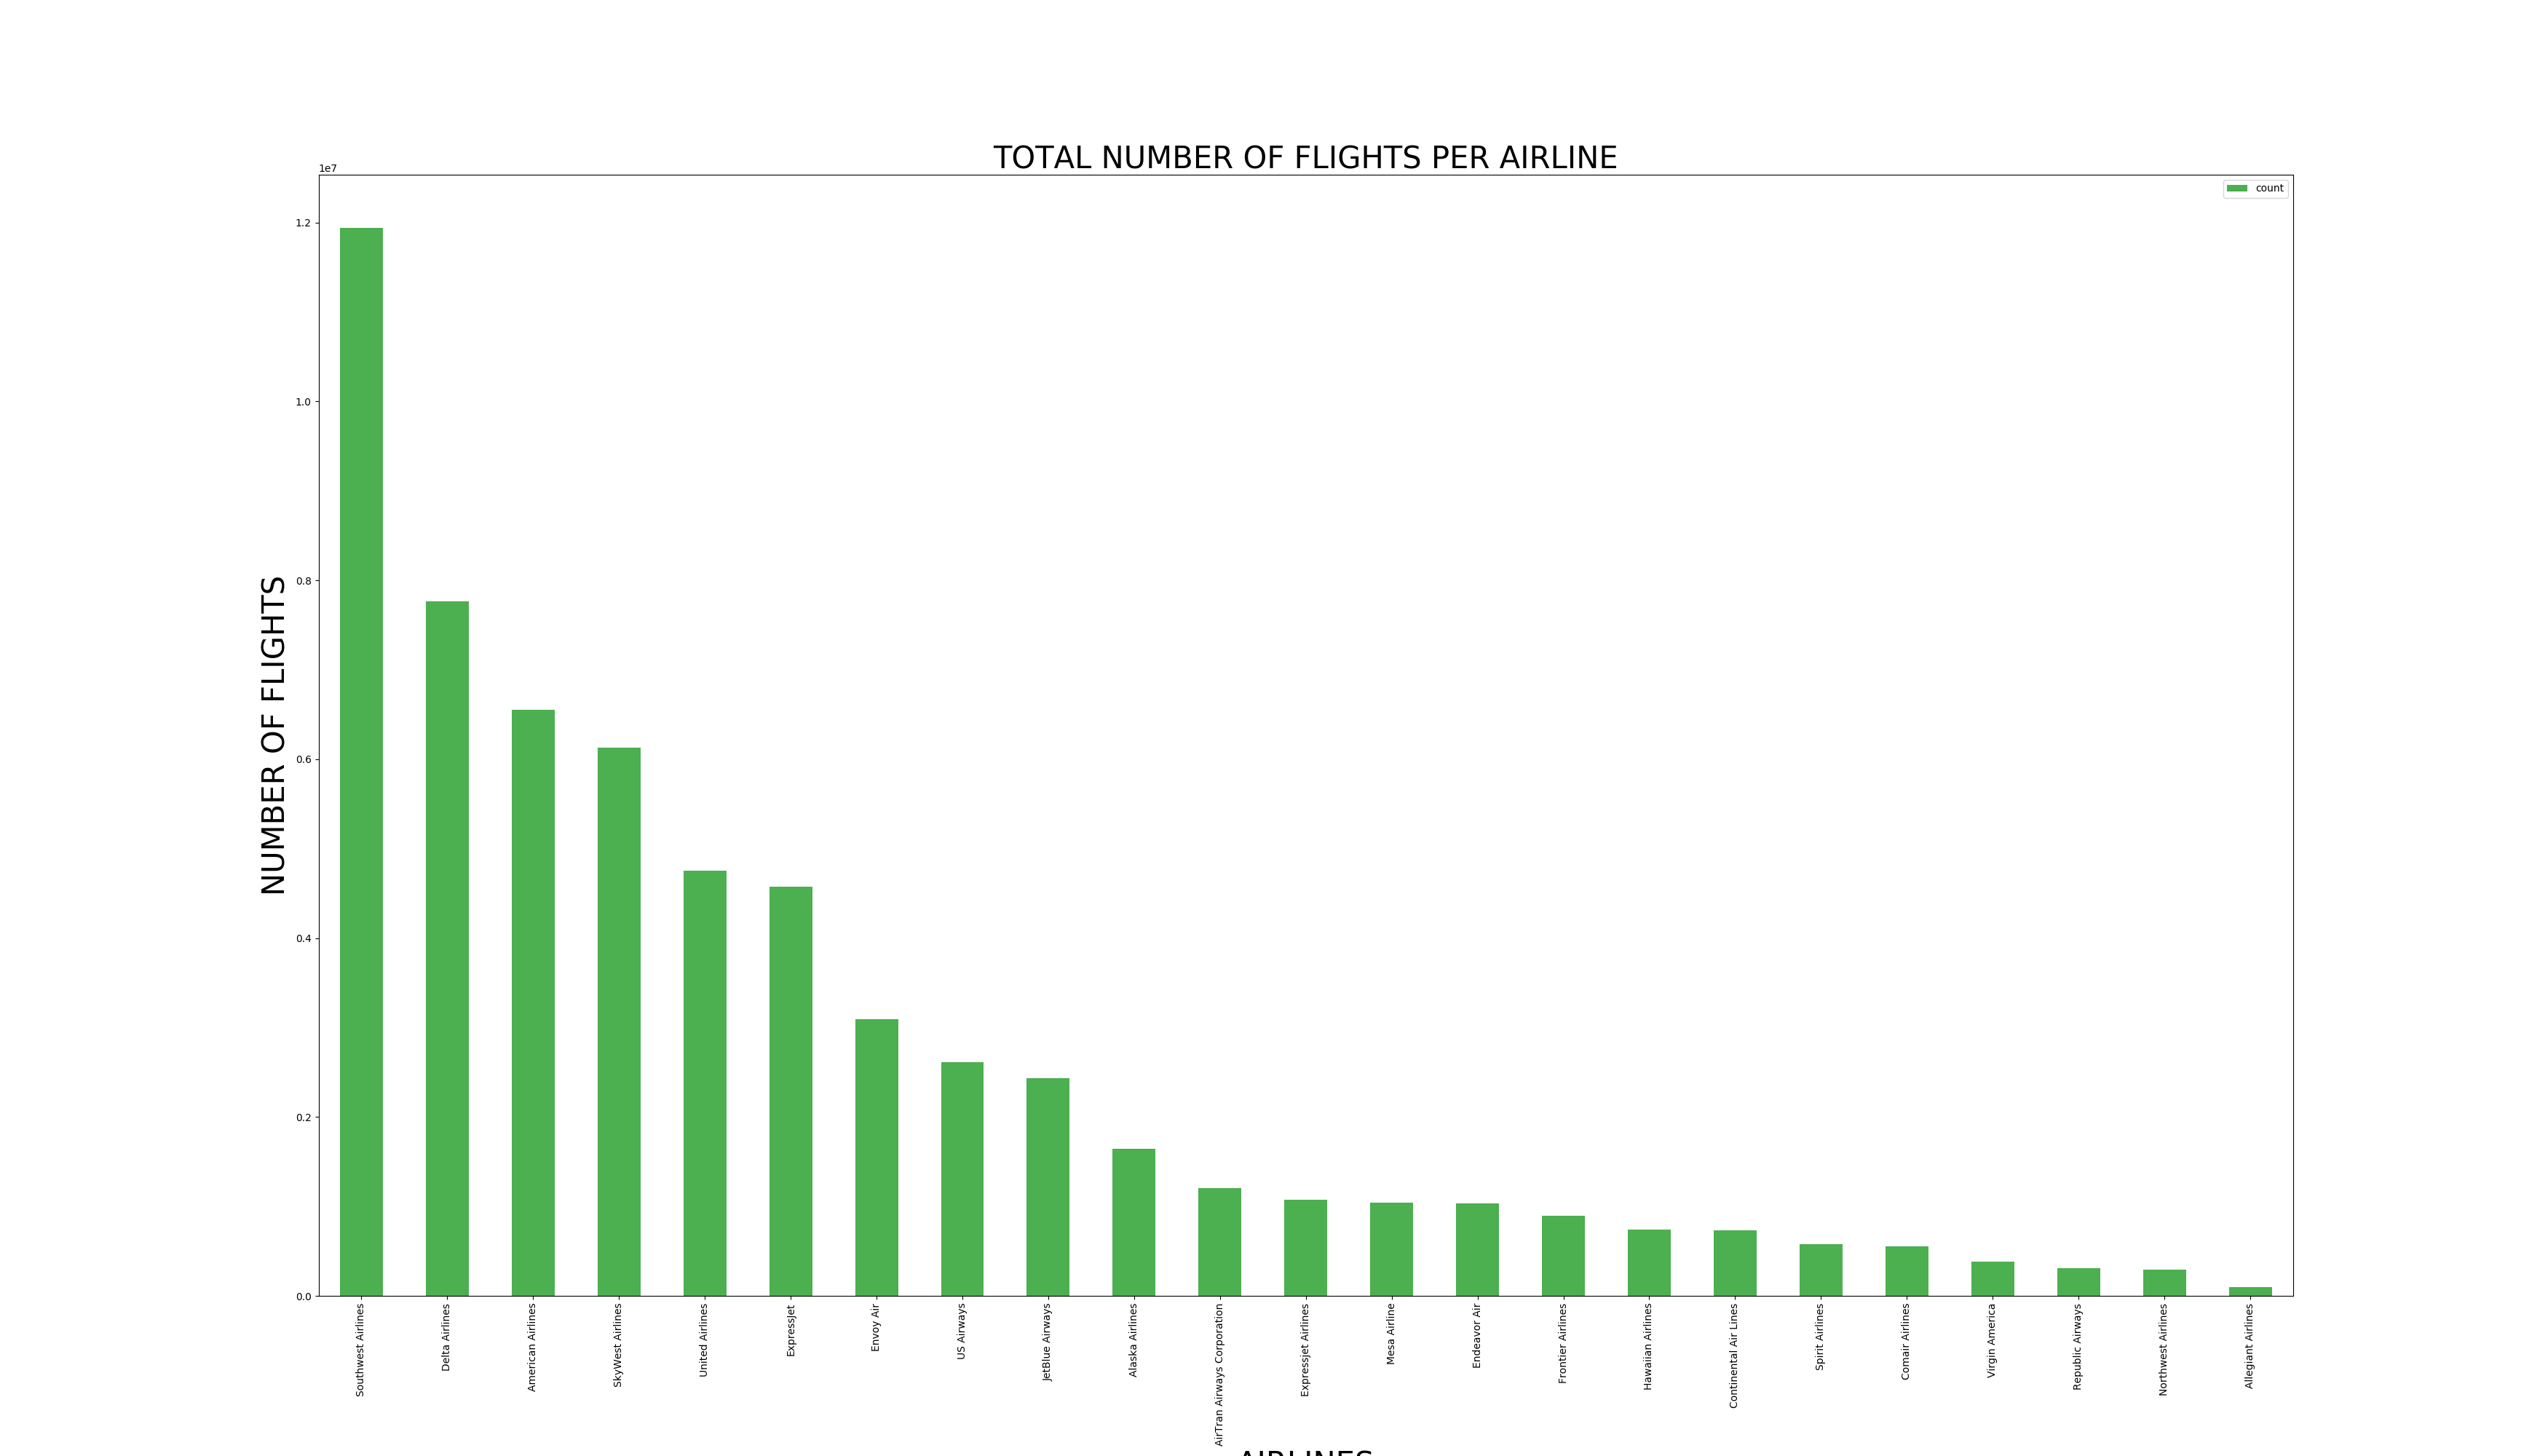

In [9]:
df_airline =df.groupBy('OP_CARRIER').count().orderBy(col('count').desc()).toPandas()
from matplotlib import pyplot as plt
import numpy as np
plt.rcParams['figure.figsize'] = [35,20]
df_airline.plot.bar( color = "#4CAF50")
plt.style.use('seaborn-deep')
plt.title('TOTAL NUMBER OF FLIGHTS PER AIRLINE', fontsize=30)
plt.xlabel('AIRLINES', fontsize=30)
plt.ylabel('NUMBER OF FLIGHTS', fontsize=30)
plt.rc('xtick',labelsize=15)
plt.rc('ytick',labelsize=15)
xpos = np.arange(len(df_airline.OP_CARRIER))
plt.xticks(xpos,df_airline['OP_CARRIER'],rotation = 90)
plt.show();
%matplot plt

# Number of Delayed Flights by Airline

In order to calculate the number of delayed flights, we used the engineered column FLIGHT_STATUS by adding all it's values per airline and sorting them in descending order:

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

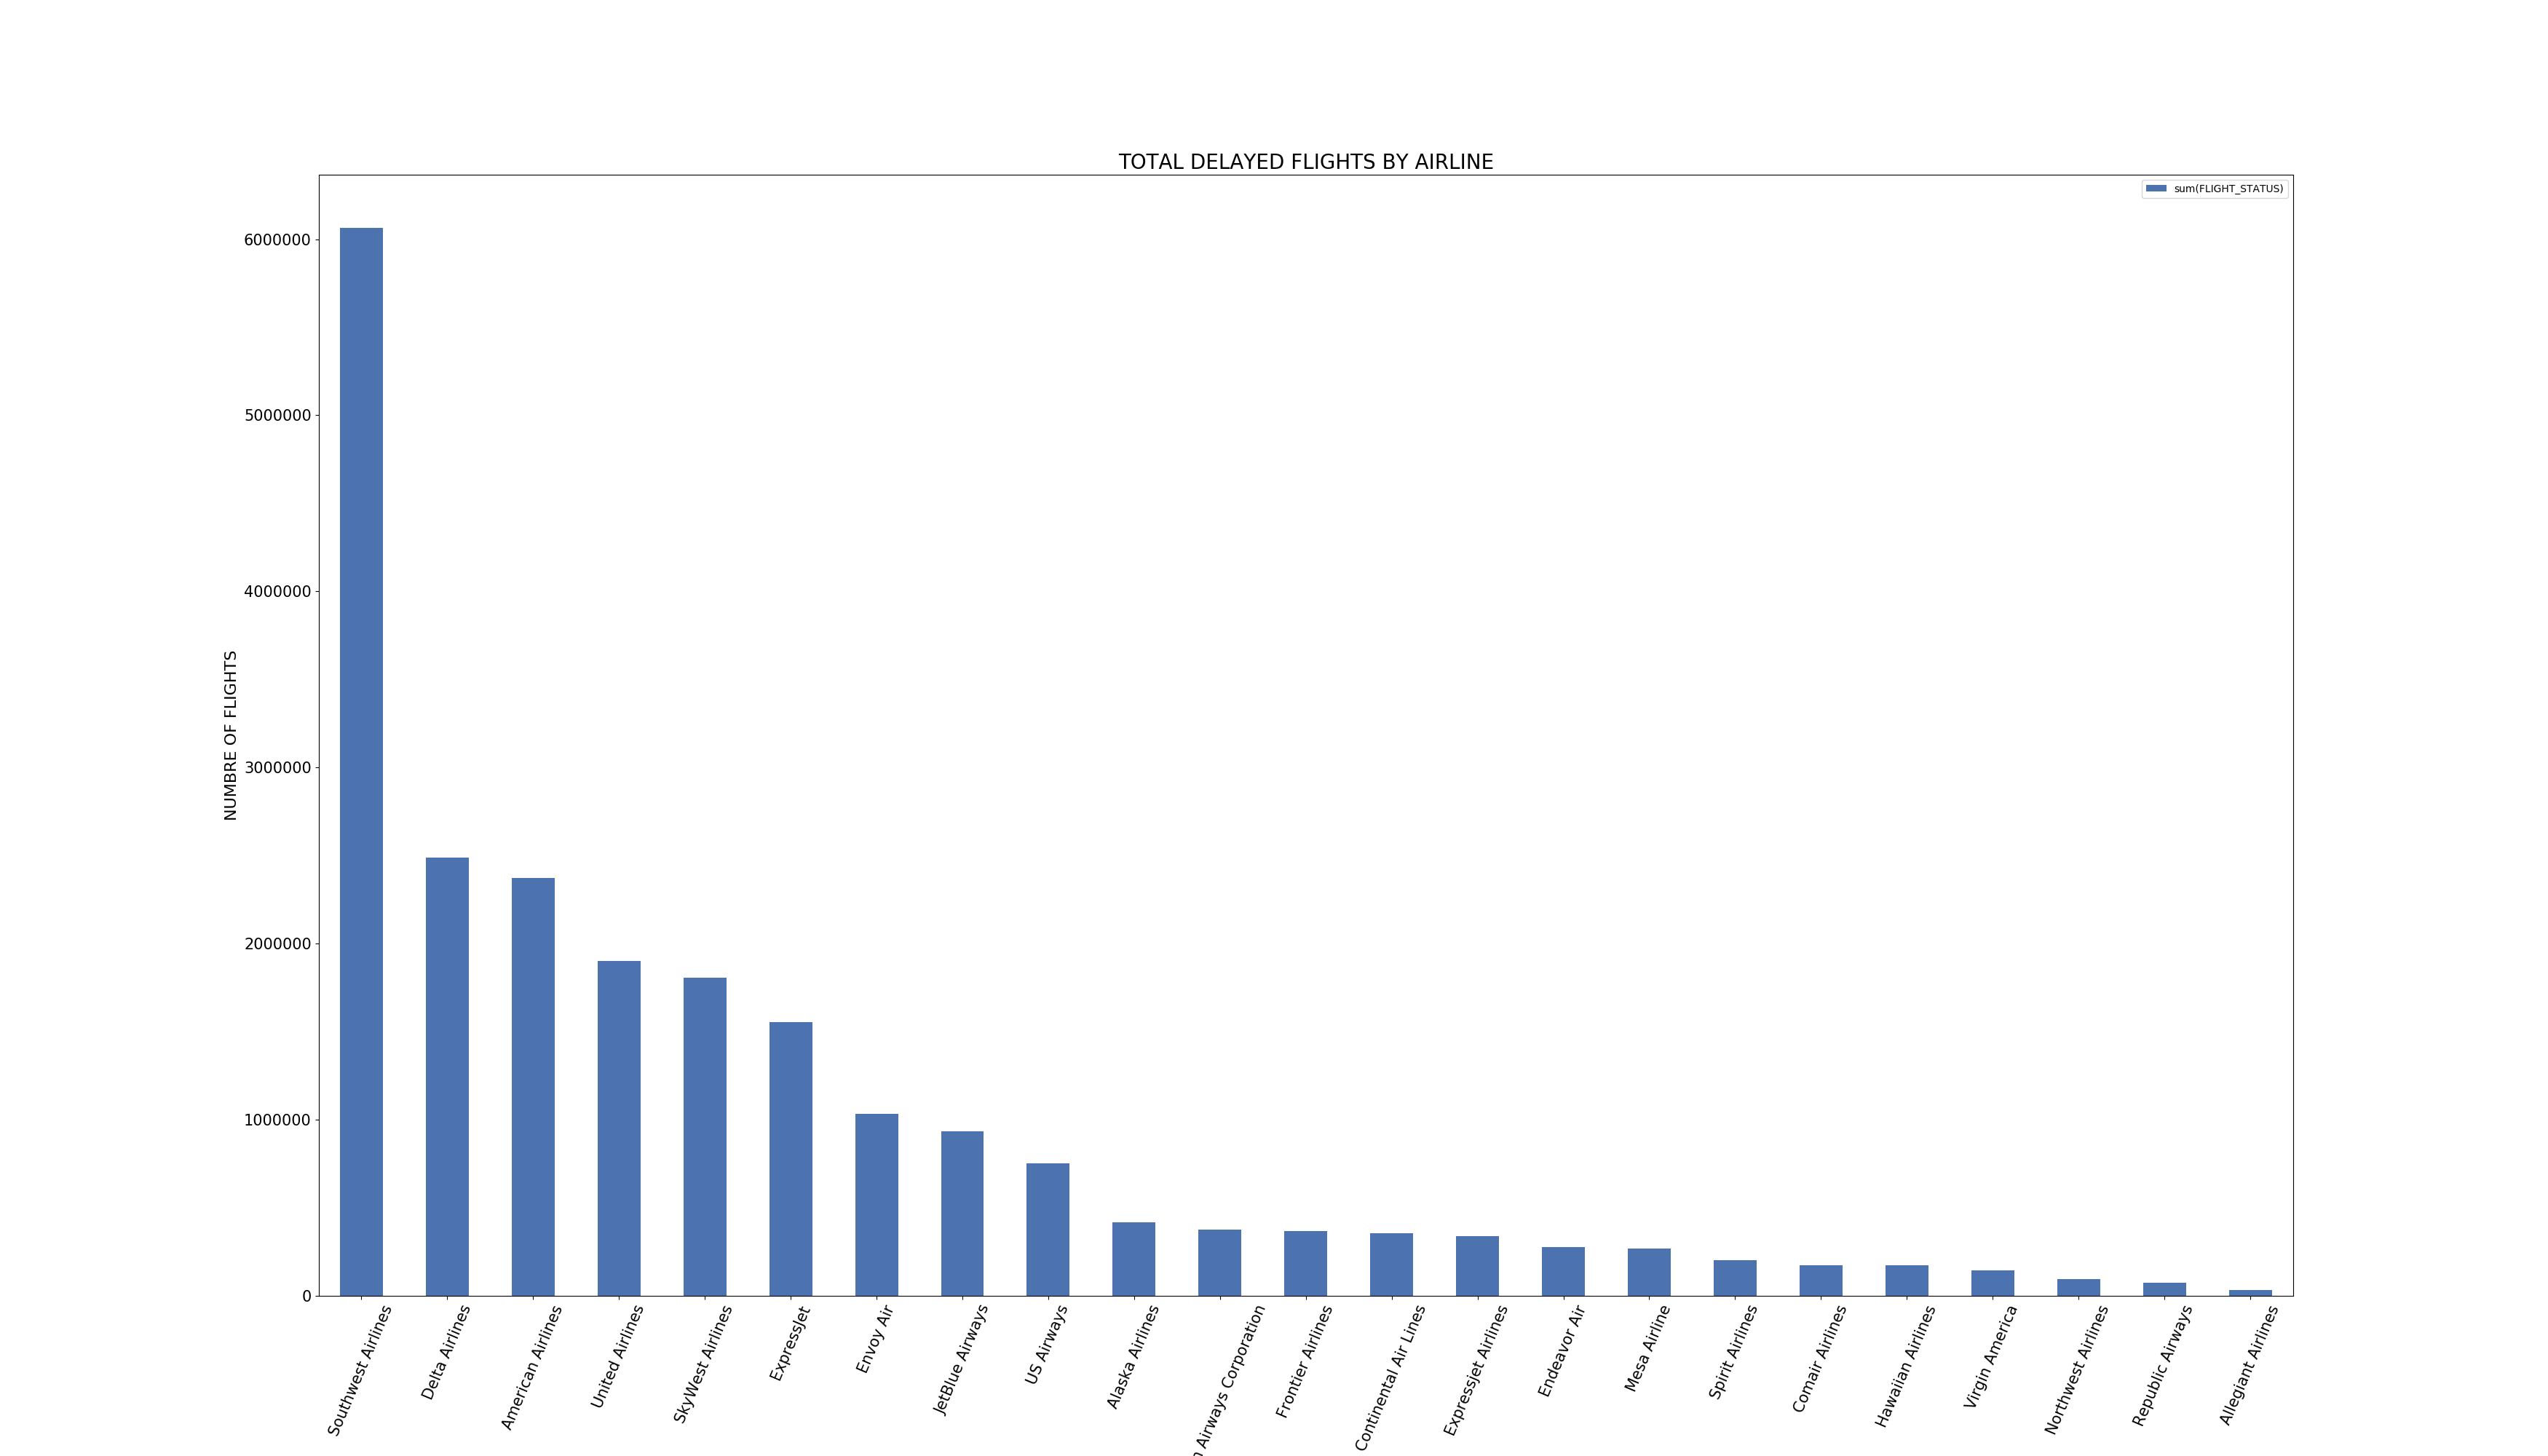

In [10]:
TDFbyA=df.groupBy('OP_CARRIER').agg(F.sum("FLIGHT_STATUS")).orderBy(col("sum(FLIGHT_STATUS)").desc())
TDFbyA=TDFbyA.toPandas()
plt.figure(figsize=(30,18))
xpos = np.arange(len(TDFbyA.OP_CARRIER))
TDFbyA.plot.bar()
plt.title('TOTAL DELAYED FLIGHTS BY AIRLINE', fontsize=20)
plt.xlabel('AIRLINEE NAME', fontsize=16)
plt.ylabel('NUMBRE OF FLIGHTS', fontsize=16)
plt.rc('xtick',labelsize=10)
plt.rc('ytick',labelsize=10)
plt.xticks(xpos,TDFbyA['OP_CARRIER'],rotation = 67)
plt.show();
%matplot plt

# Percentage of delayed flights per airline

The first thing to calculate is the percentage of delayed flights so that we can do proper comparisons with each airline. In other words, airlines would want to be below the average percentage of delayed flights to be in an acceptable position, so that magic number will represent our threshold. Airlines above would be by common sense the ones that travelers would want to avoid as it means you those will have the most delays.

In order to calculate the percentage of delayed flights by airline, I will use the engineered column 'FLIGHT_STATUS' by adding all it's values per airline and converting them into percentage for better understanding.

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

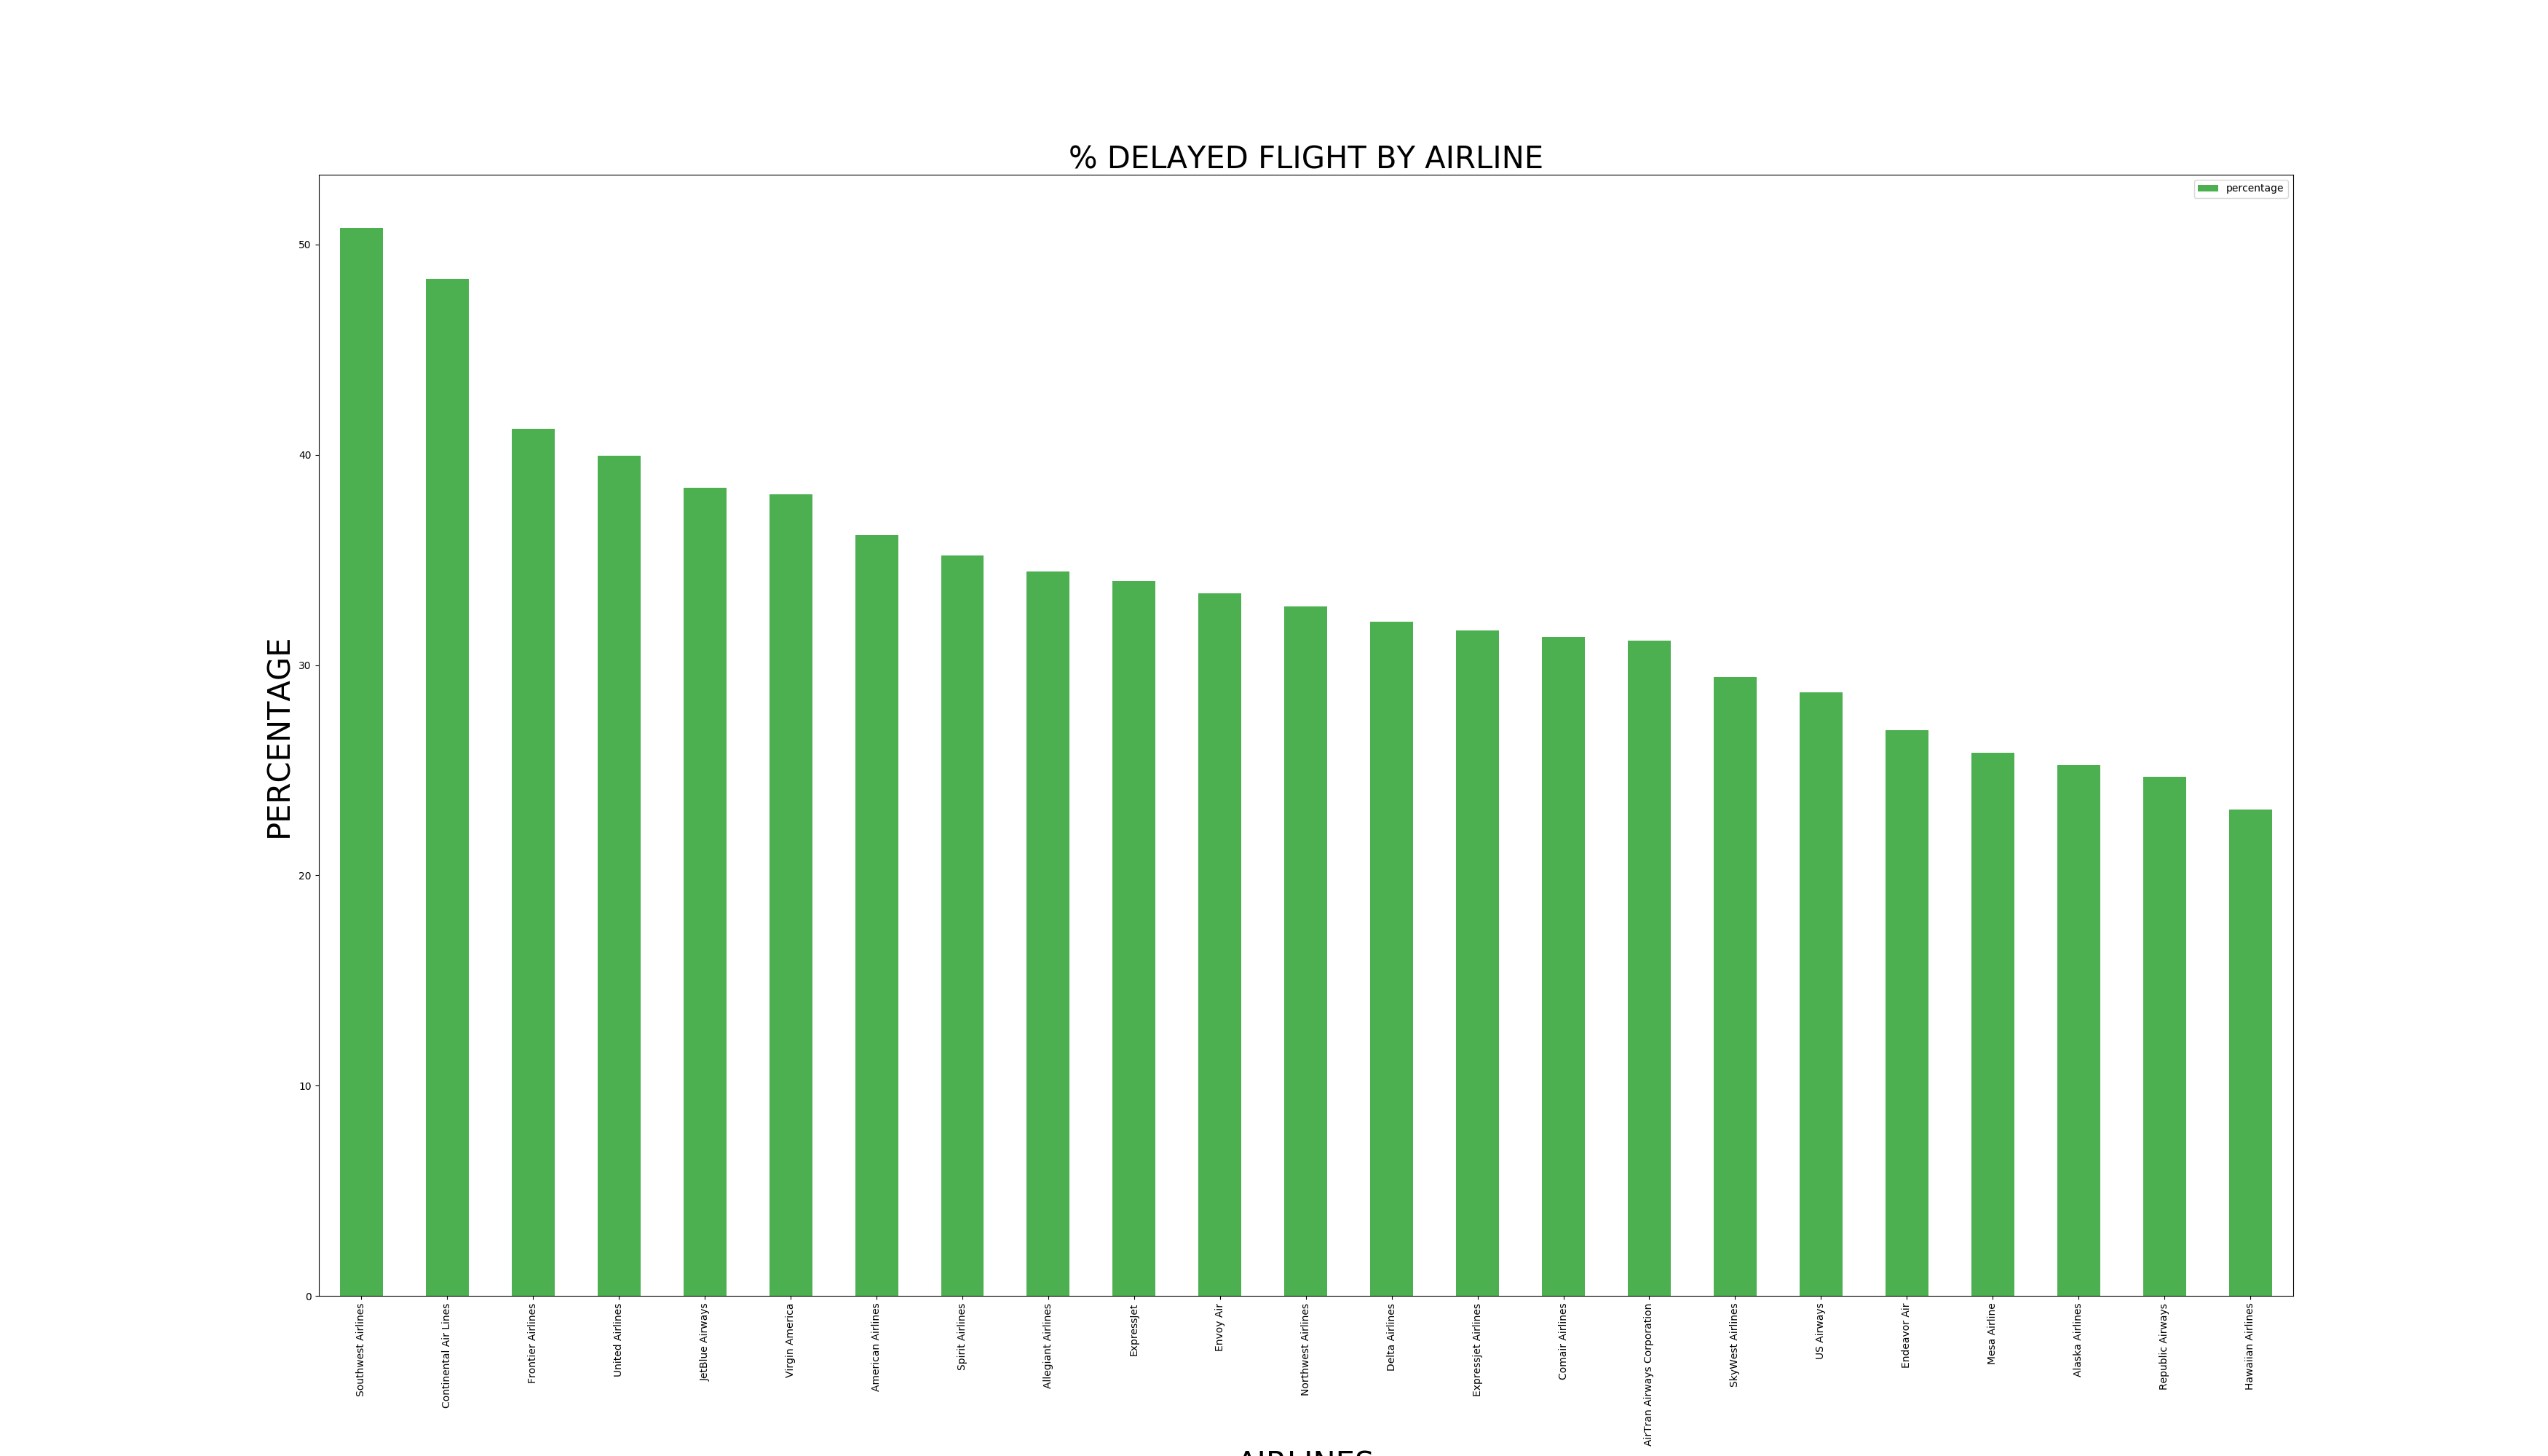

In [11]:
test_1 = df.groupby('OP_CARRIER').count()
test_1 =test_1.select(col('OP_CARRIER').alias("OP_CARRIER_1"),'count')
test_2=df.groupBy('OP_CARRIER').agg(F.sum("FLIGHT_STATUS"))
comb_df=test_1.join(test_2,test_1.OP_CARRIER_1 ==  test_2.OP_CARRIER,"inner")
comb_df = comb_df.withColumn("percentage", col("sum(FLIGHT_STATUS)")*100/col("count"))
comb_df_1=comb_df.select("OP_CARRIER","percentage").orderBy(col('percentage').desc()).toPandas()


plt.rcParams['figure.figsize'] = [35,20]
comb_df_1.plot.bar( color = "#4CAF50")
plt.style.use('seaborn-deep')
plt.title('% DELAYED FLIGHT BY AIRLINE', fontsize=30)
plt.xlabel('AIRLINES', fontsize=30)
plt.ylabel('PERCENTAGE', fontsize=30)
plt.rc('xtick',labelsize=15)
plt.rc('ytick',labelsize=15)
xpos = np.arange(len(comb_df_1.OP_CARRIER))
plt.xticks(xpos,comb_df_1['OP_CARRIER'],rotation = 90)
plt.show();
%matplot plt

# Total Minutes Delayed by Airline
This next plot is quite interesting because it looks at the total number of minutes

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

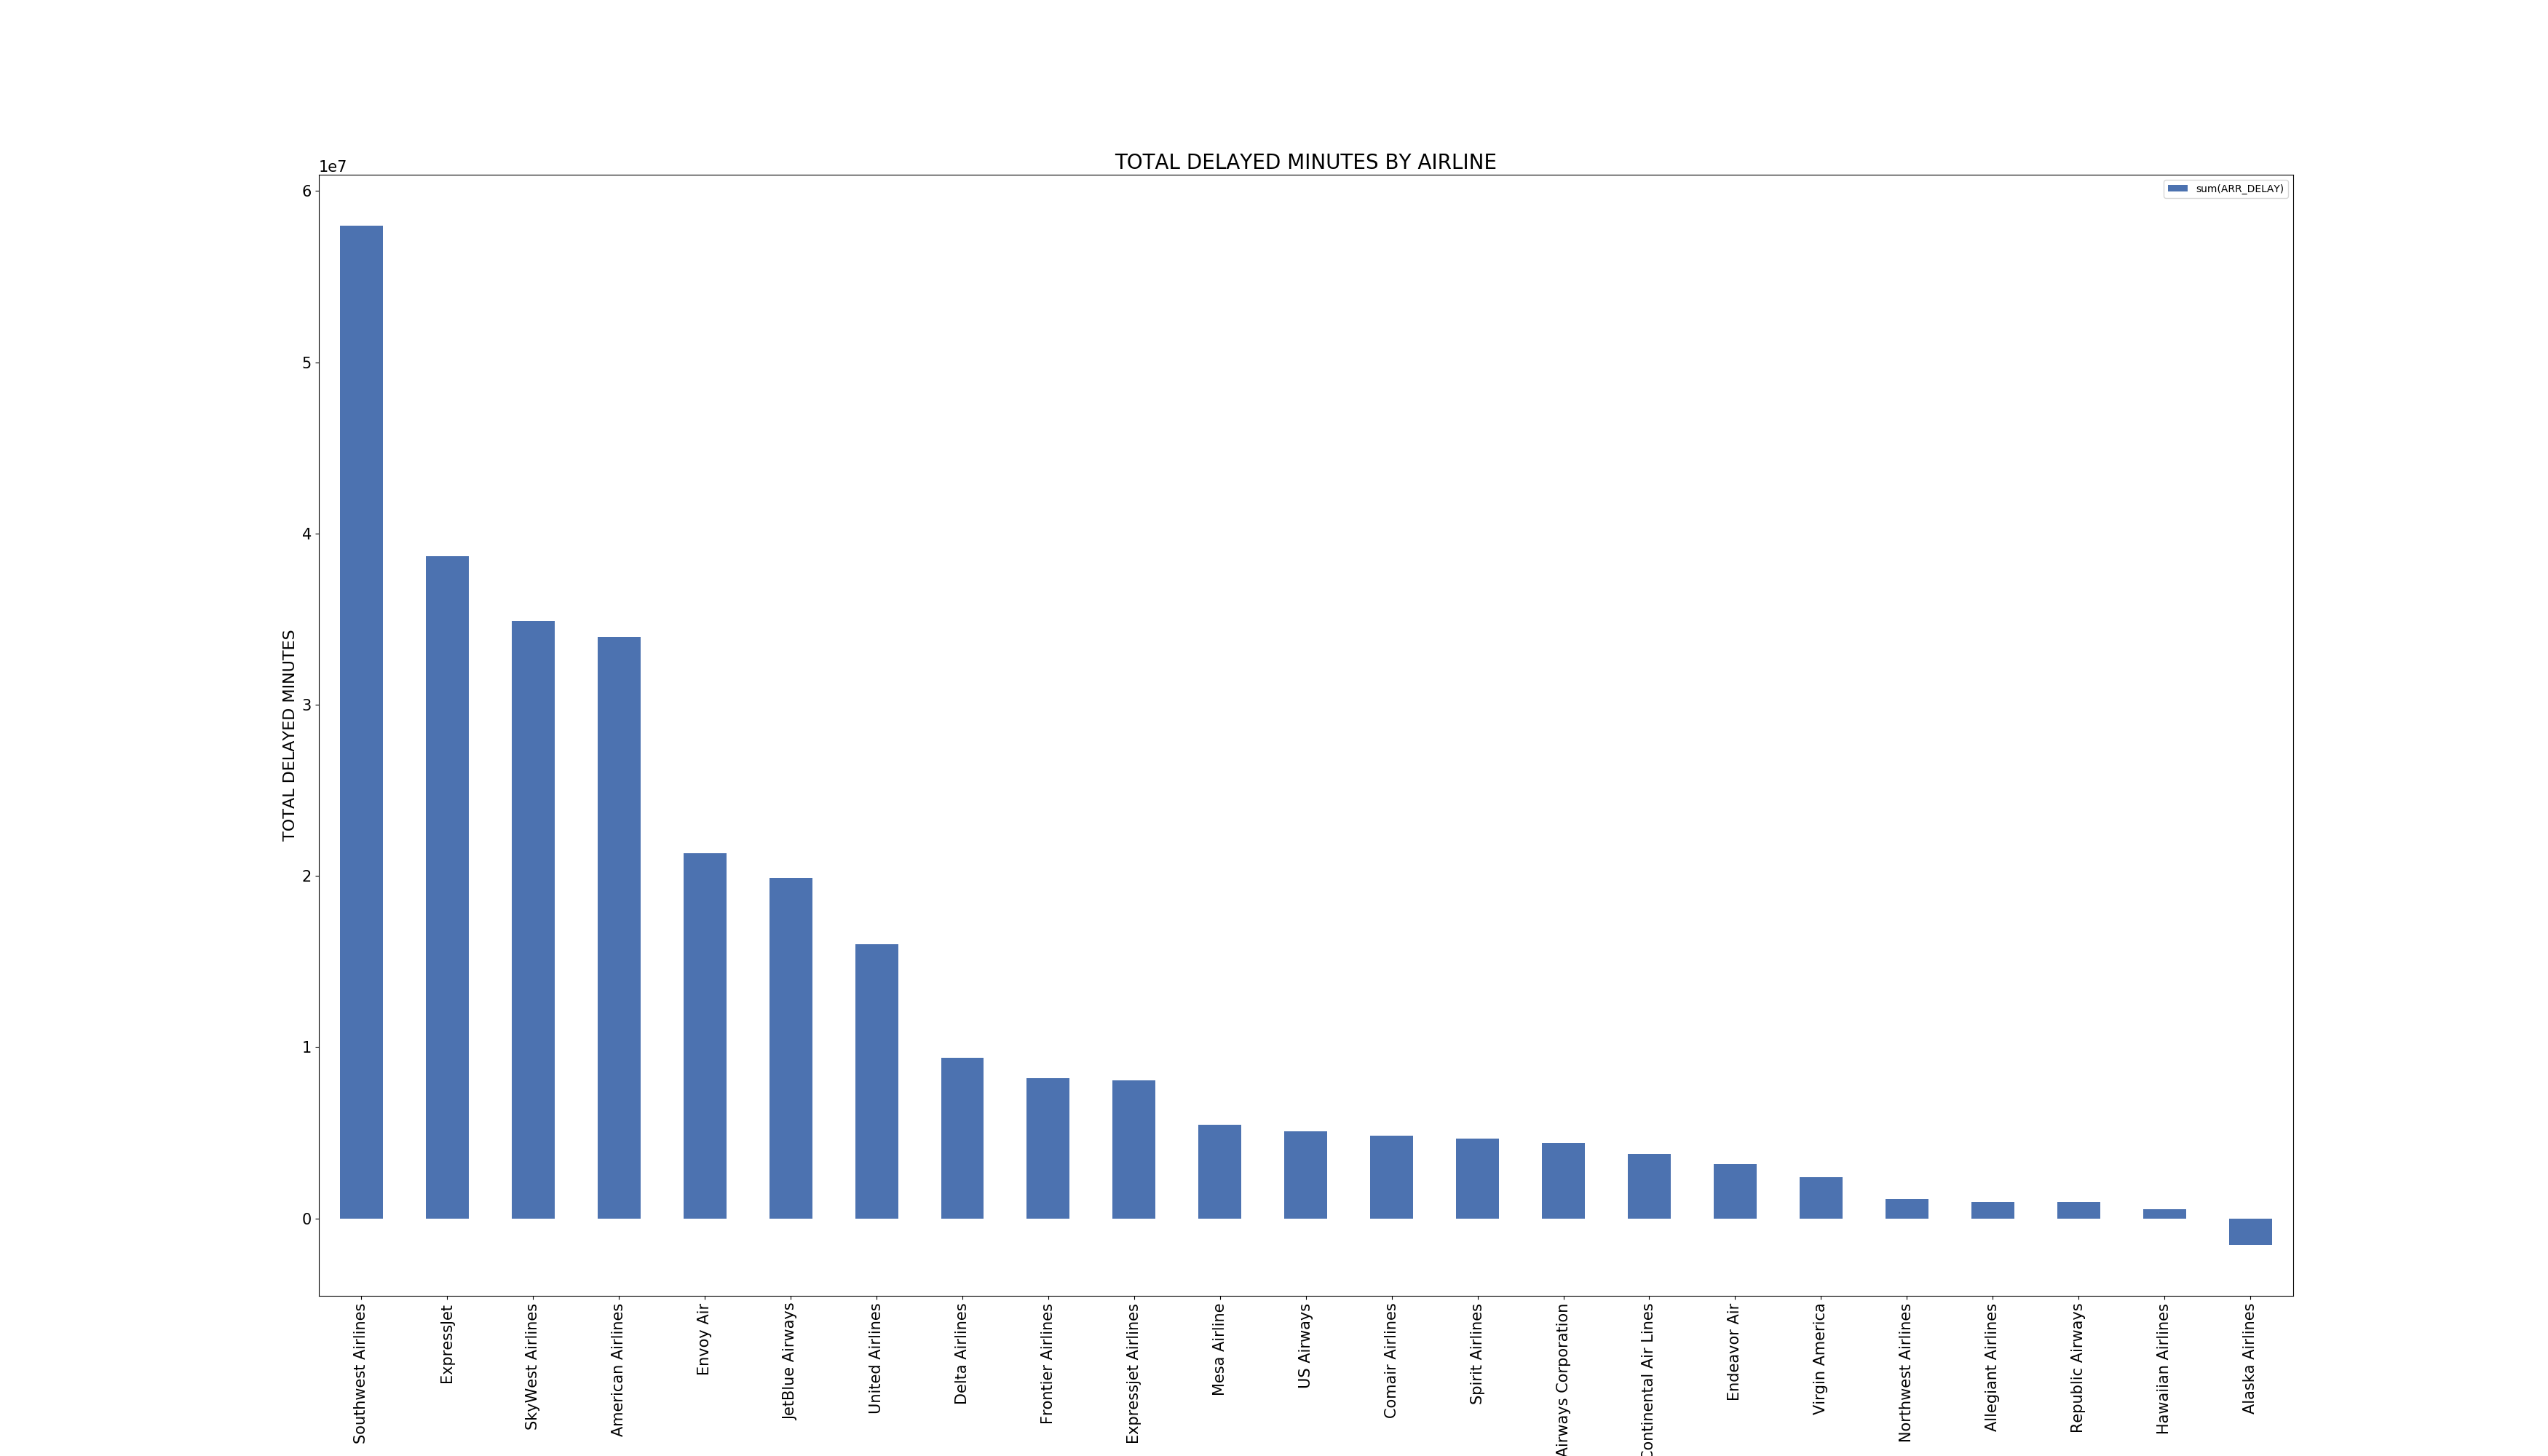

In [12]:
TotalDelay=df.groupBy('OP_CARRIER').agg(F.sum("ARR_DELAY")).orderBy(col("sum(ARR_DELAY)").desc()).toPandas()
plt.figure(figsize=(18,50))
xpos = np.arange(len(TotalDelay.OP_CARRIER))
TotalDelay.plot.bar()
plt.title('TOTAL DELAYED MINUTES BY AIRLINE', fontsize=20)
plt.xlabel('AIRLINES', fontsize=16)
plt.ylabel('TOTAL DELAYED MINUTES', fontsize=16)
plt.rc('xtick',labelsize=2)
plt.rc('ytick',labelsize=1)
plt.xticks(xpos,TotalDelay['OP_CARRIER'],rotation = 90)
plt.show();
%matplot plt

# Average delay time per airline

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

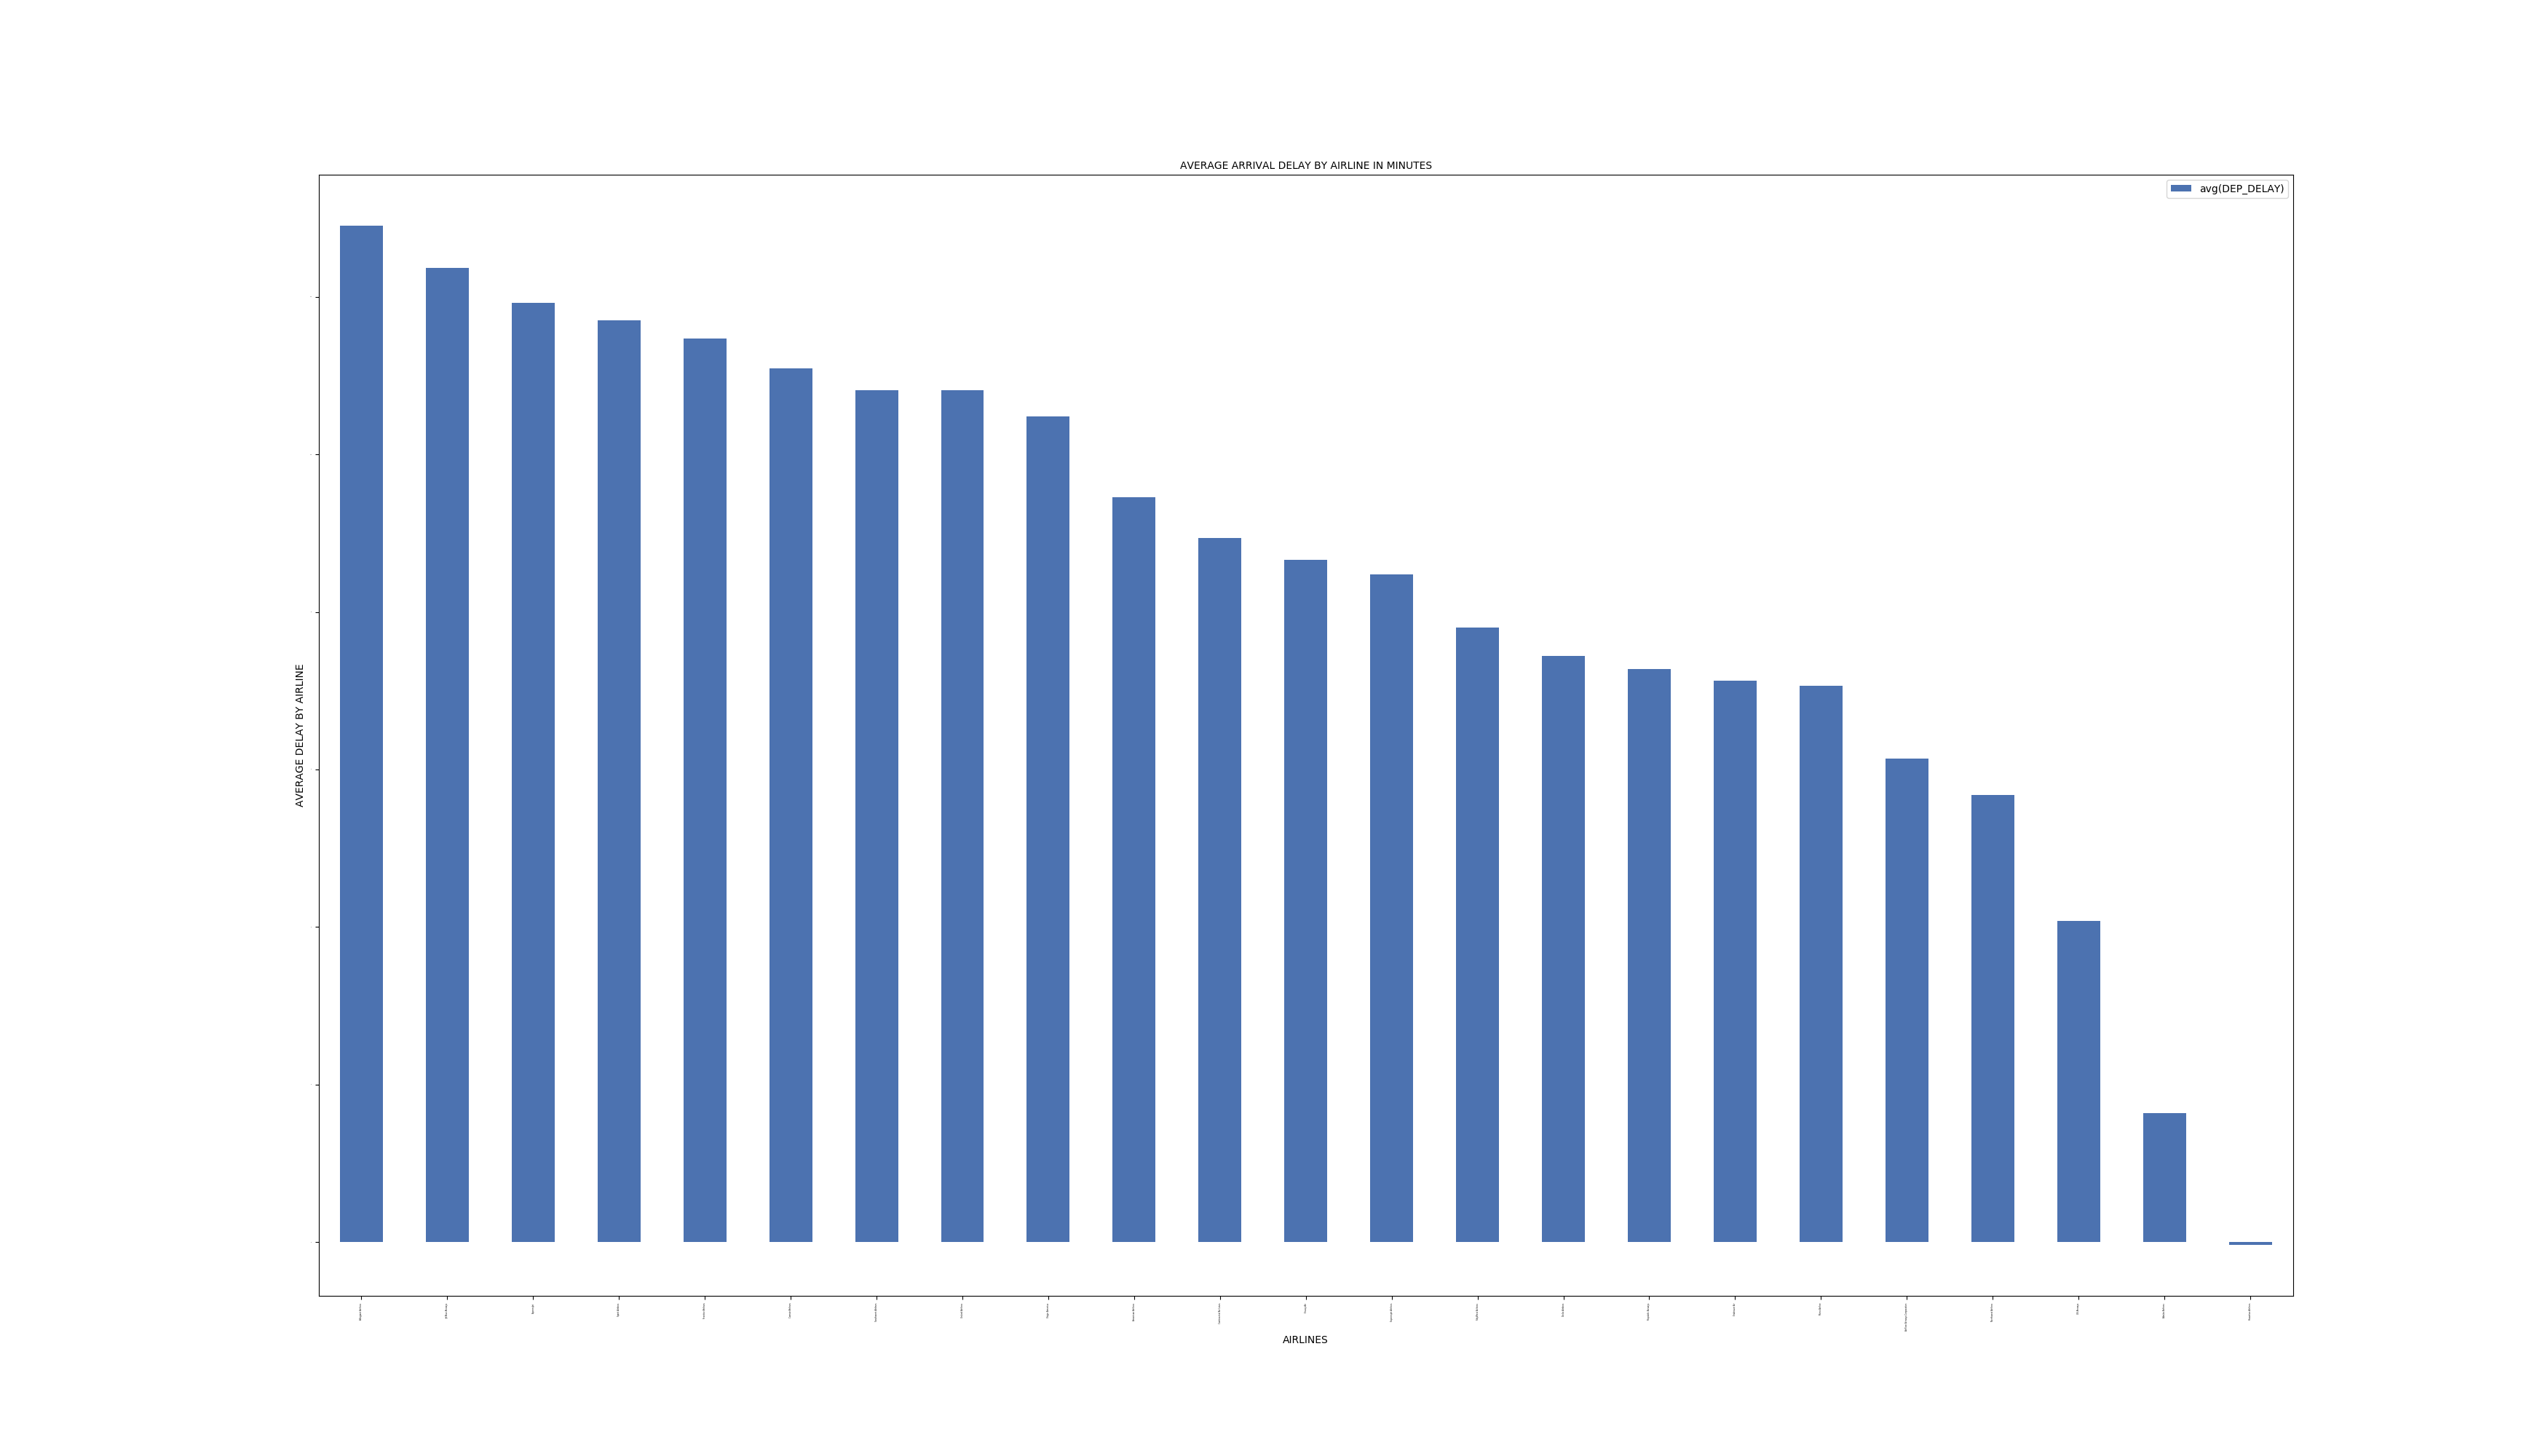

In [13]:
avgcol = df.groupBy('OP_CARRIER').agg(F.avg(col("DEP_DELAY"))).orderBy(col("avg(DEP_DELAY)").desc()).toPandas()
plt.figure(figsize=(18,50))
xpos = np.arange(len(avgcol.OP_CARRIER))
avgcol.plot.bar()
plt.title('AVERAGE ARRIVAL DELAY BY AIRLINE IN MINUTES', fontsize=10)
plt.xlabel('AIRLINES', fontsize=10)
plt.ylabel('AVERAGE DELAY BY AIRLINE', fontsize=10)
plt.rc('xtick',labelsize=2)
plt.rc('ytick',labelsize=2)
plt.xticks(xpos,avgcol['OP_CARRIER'],rotation = 90)
plt.show();
%matplot plt


# 20 Most Common Destination (Cities)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

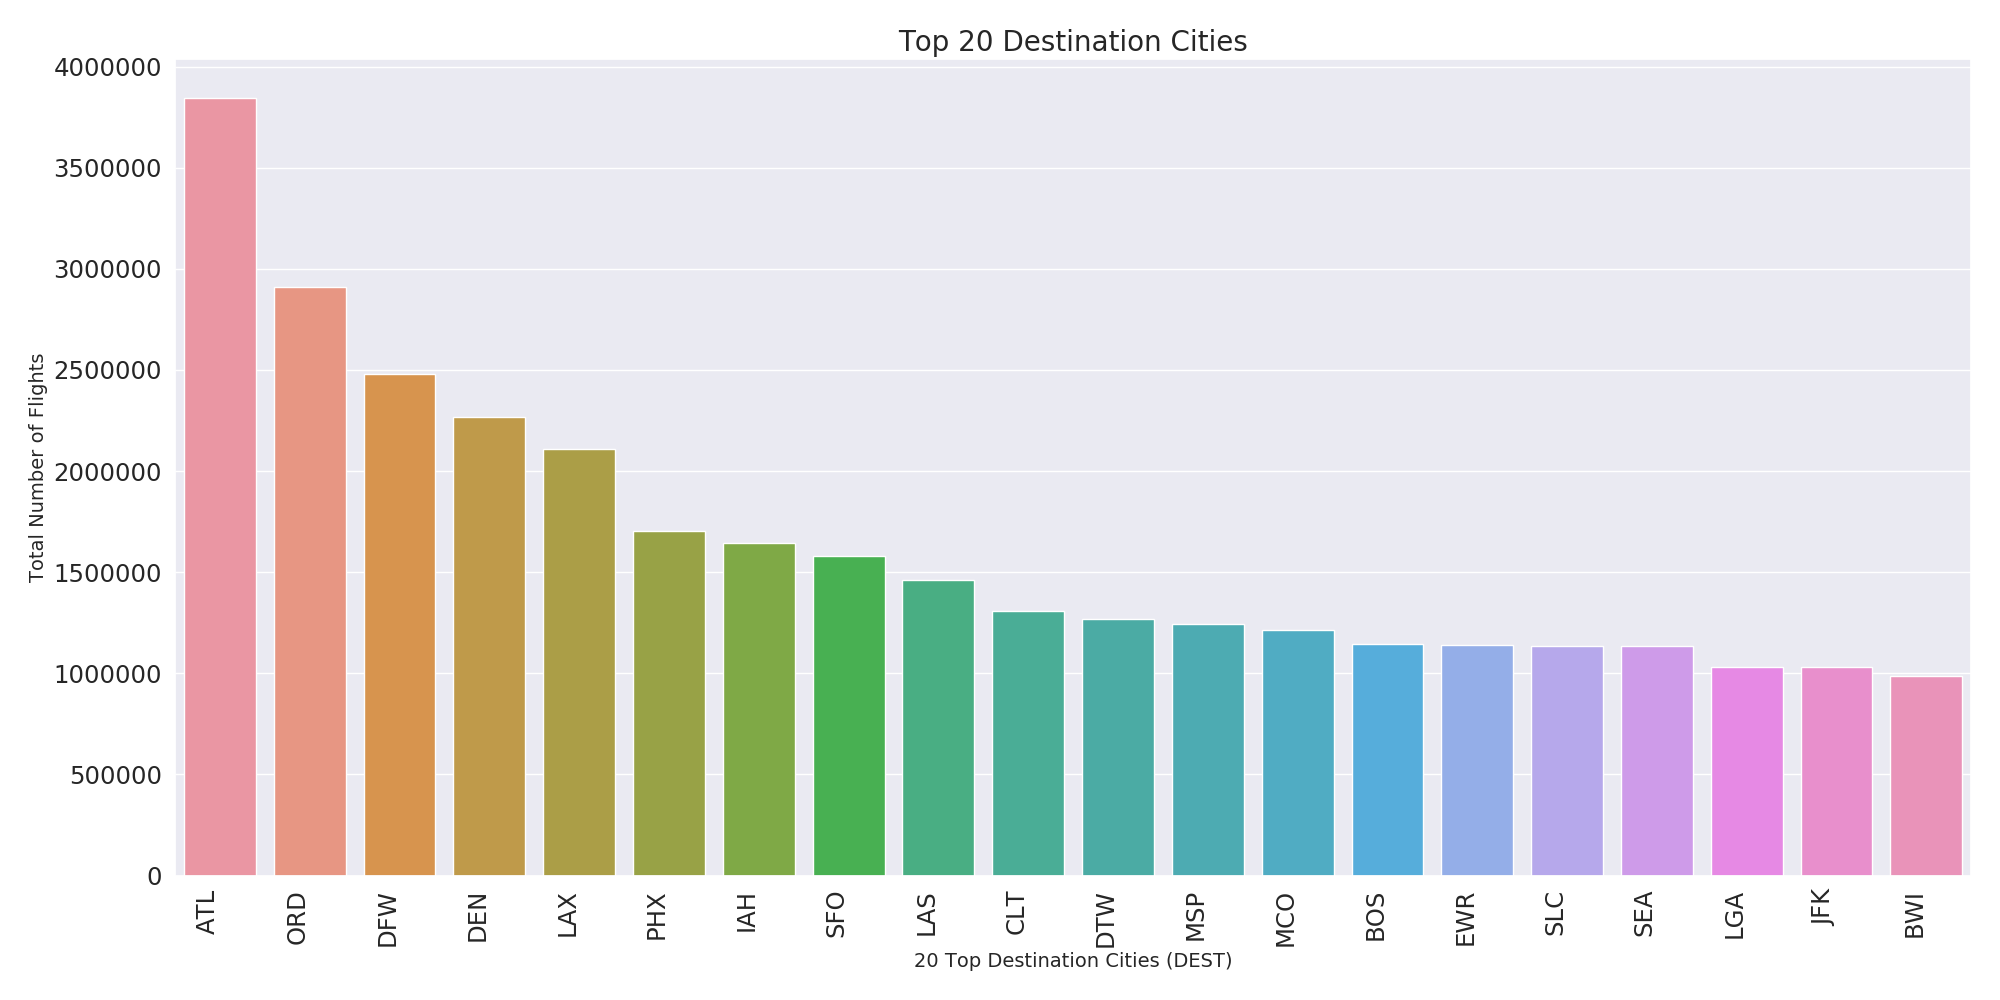

In [14]:
dest_df=df.groupBy('DEST').count().orderBy(col("count").desc()).limit(20)
dest_df=dest_df.toPandas()
plt.figure(figsize=(20, 10))
sns.set(font_scale=1.6)
axis = sns.barplot(x=dest_df['DEST'],y=dest_df['count'], data=dest_df)
axis.set_xticklabels(axis.get_xticklabels(), rotation=90, ha='right')
plt.title('Top 20 Destination Cities', fontsize=20)
plt.xlabel('20 Top Destination Cities (DEST)', fontsize=14)
plt.ylabel('Total Number of Flights', fontsize=14)
plt.rc('ytick',labelsize=14)
plt.tight_layout()
plt.show();
%matplot plt

# Worse & Best months to travel based on flight delays

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

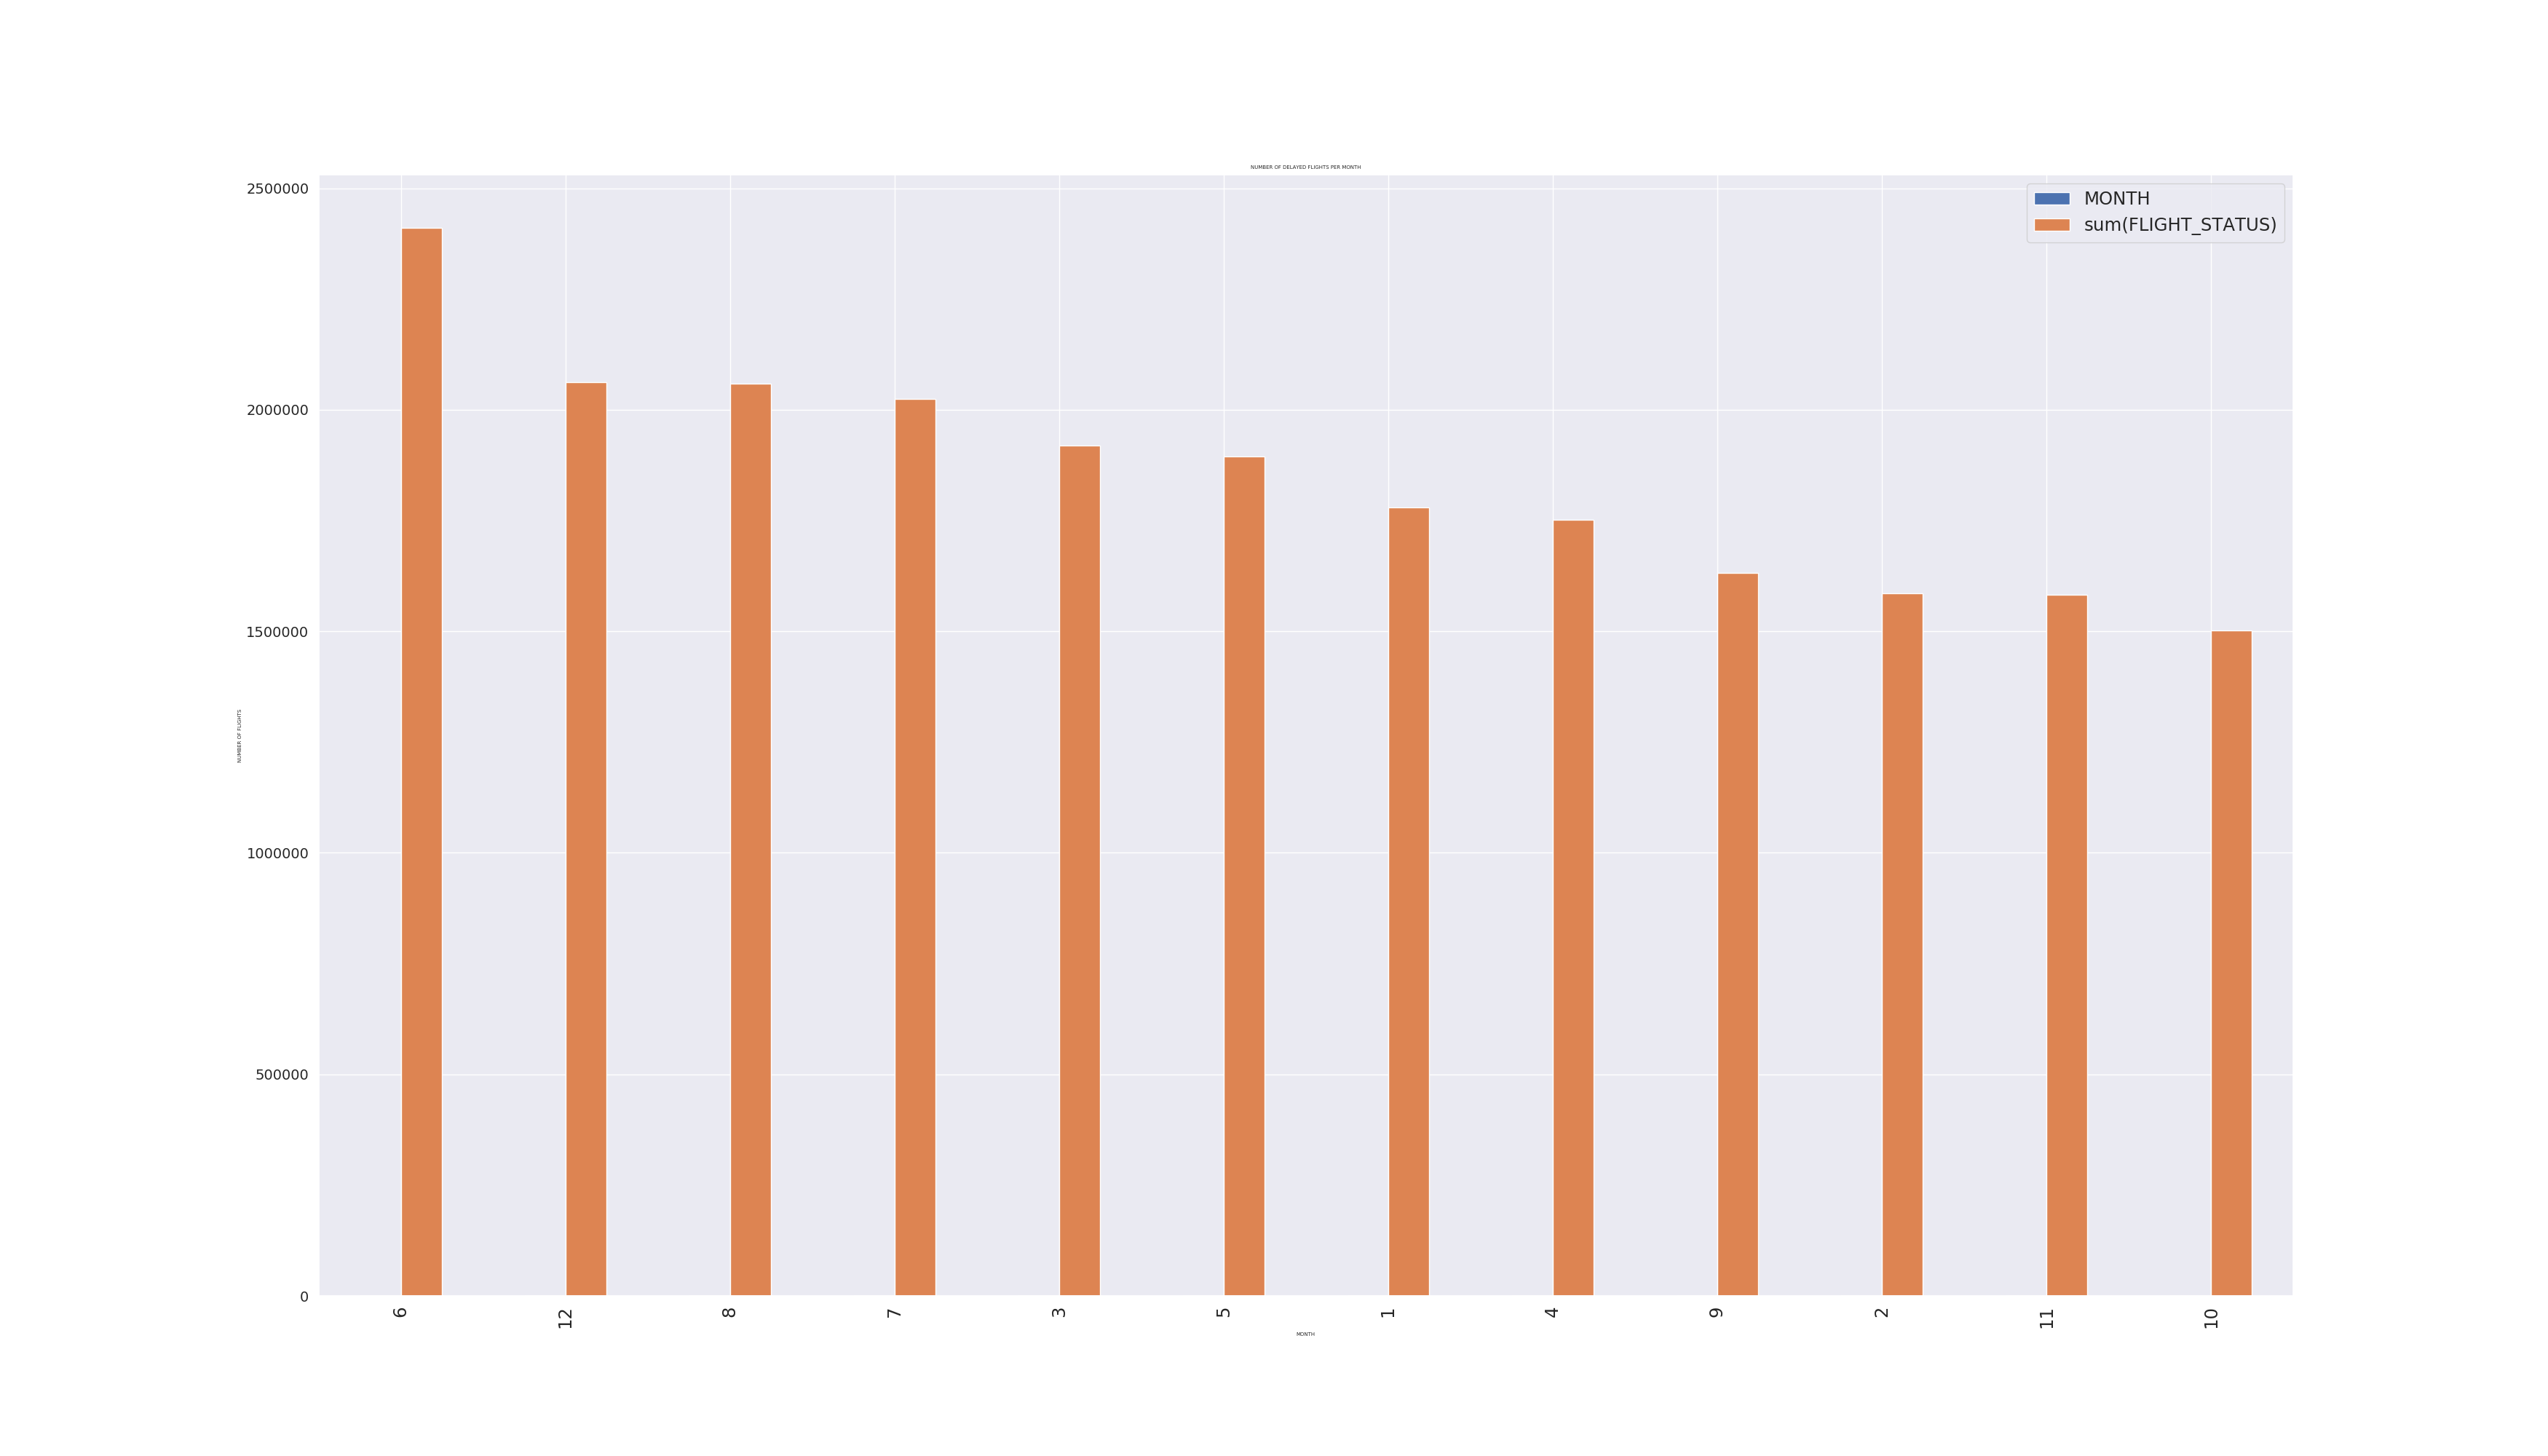

In [15]:
WorstMonths= df.groupBy('MONTH').agg(F.sum("FLIGHT_STATUS")).orderBy(col("sum(FLIGHT_STATUS)").desc()).toPandas()
plt.figure(figsize=(18,50))
xpos = np.arange(len(WorstMonths.MONTH))
WorstMonths.plot.bar()
plt.title('NUMBER OF DELAYED FLIGHTS PER MONTH', fontsize=5)
plt.xlabel('MONTH', fontsize=5)
plt.ylabel('NUMBER OF FLIGHTS', fontsize=5)
plt.rc('xtick',labelsize=20)
plt.rc('ytick',labelsize=2)
plt.xticks(xpos,WorstMonths['MONTH'],rotation = 90)
plt.show();
%matplot plt

# Is there a better day to travel?

In [16]:
from pyspark.sql.functions import dayofmonth
dayDF = df.withColumn('DAY',dayofmonth(df.FL_DATE))

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

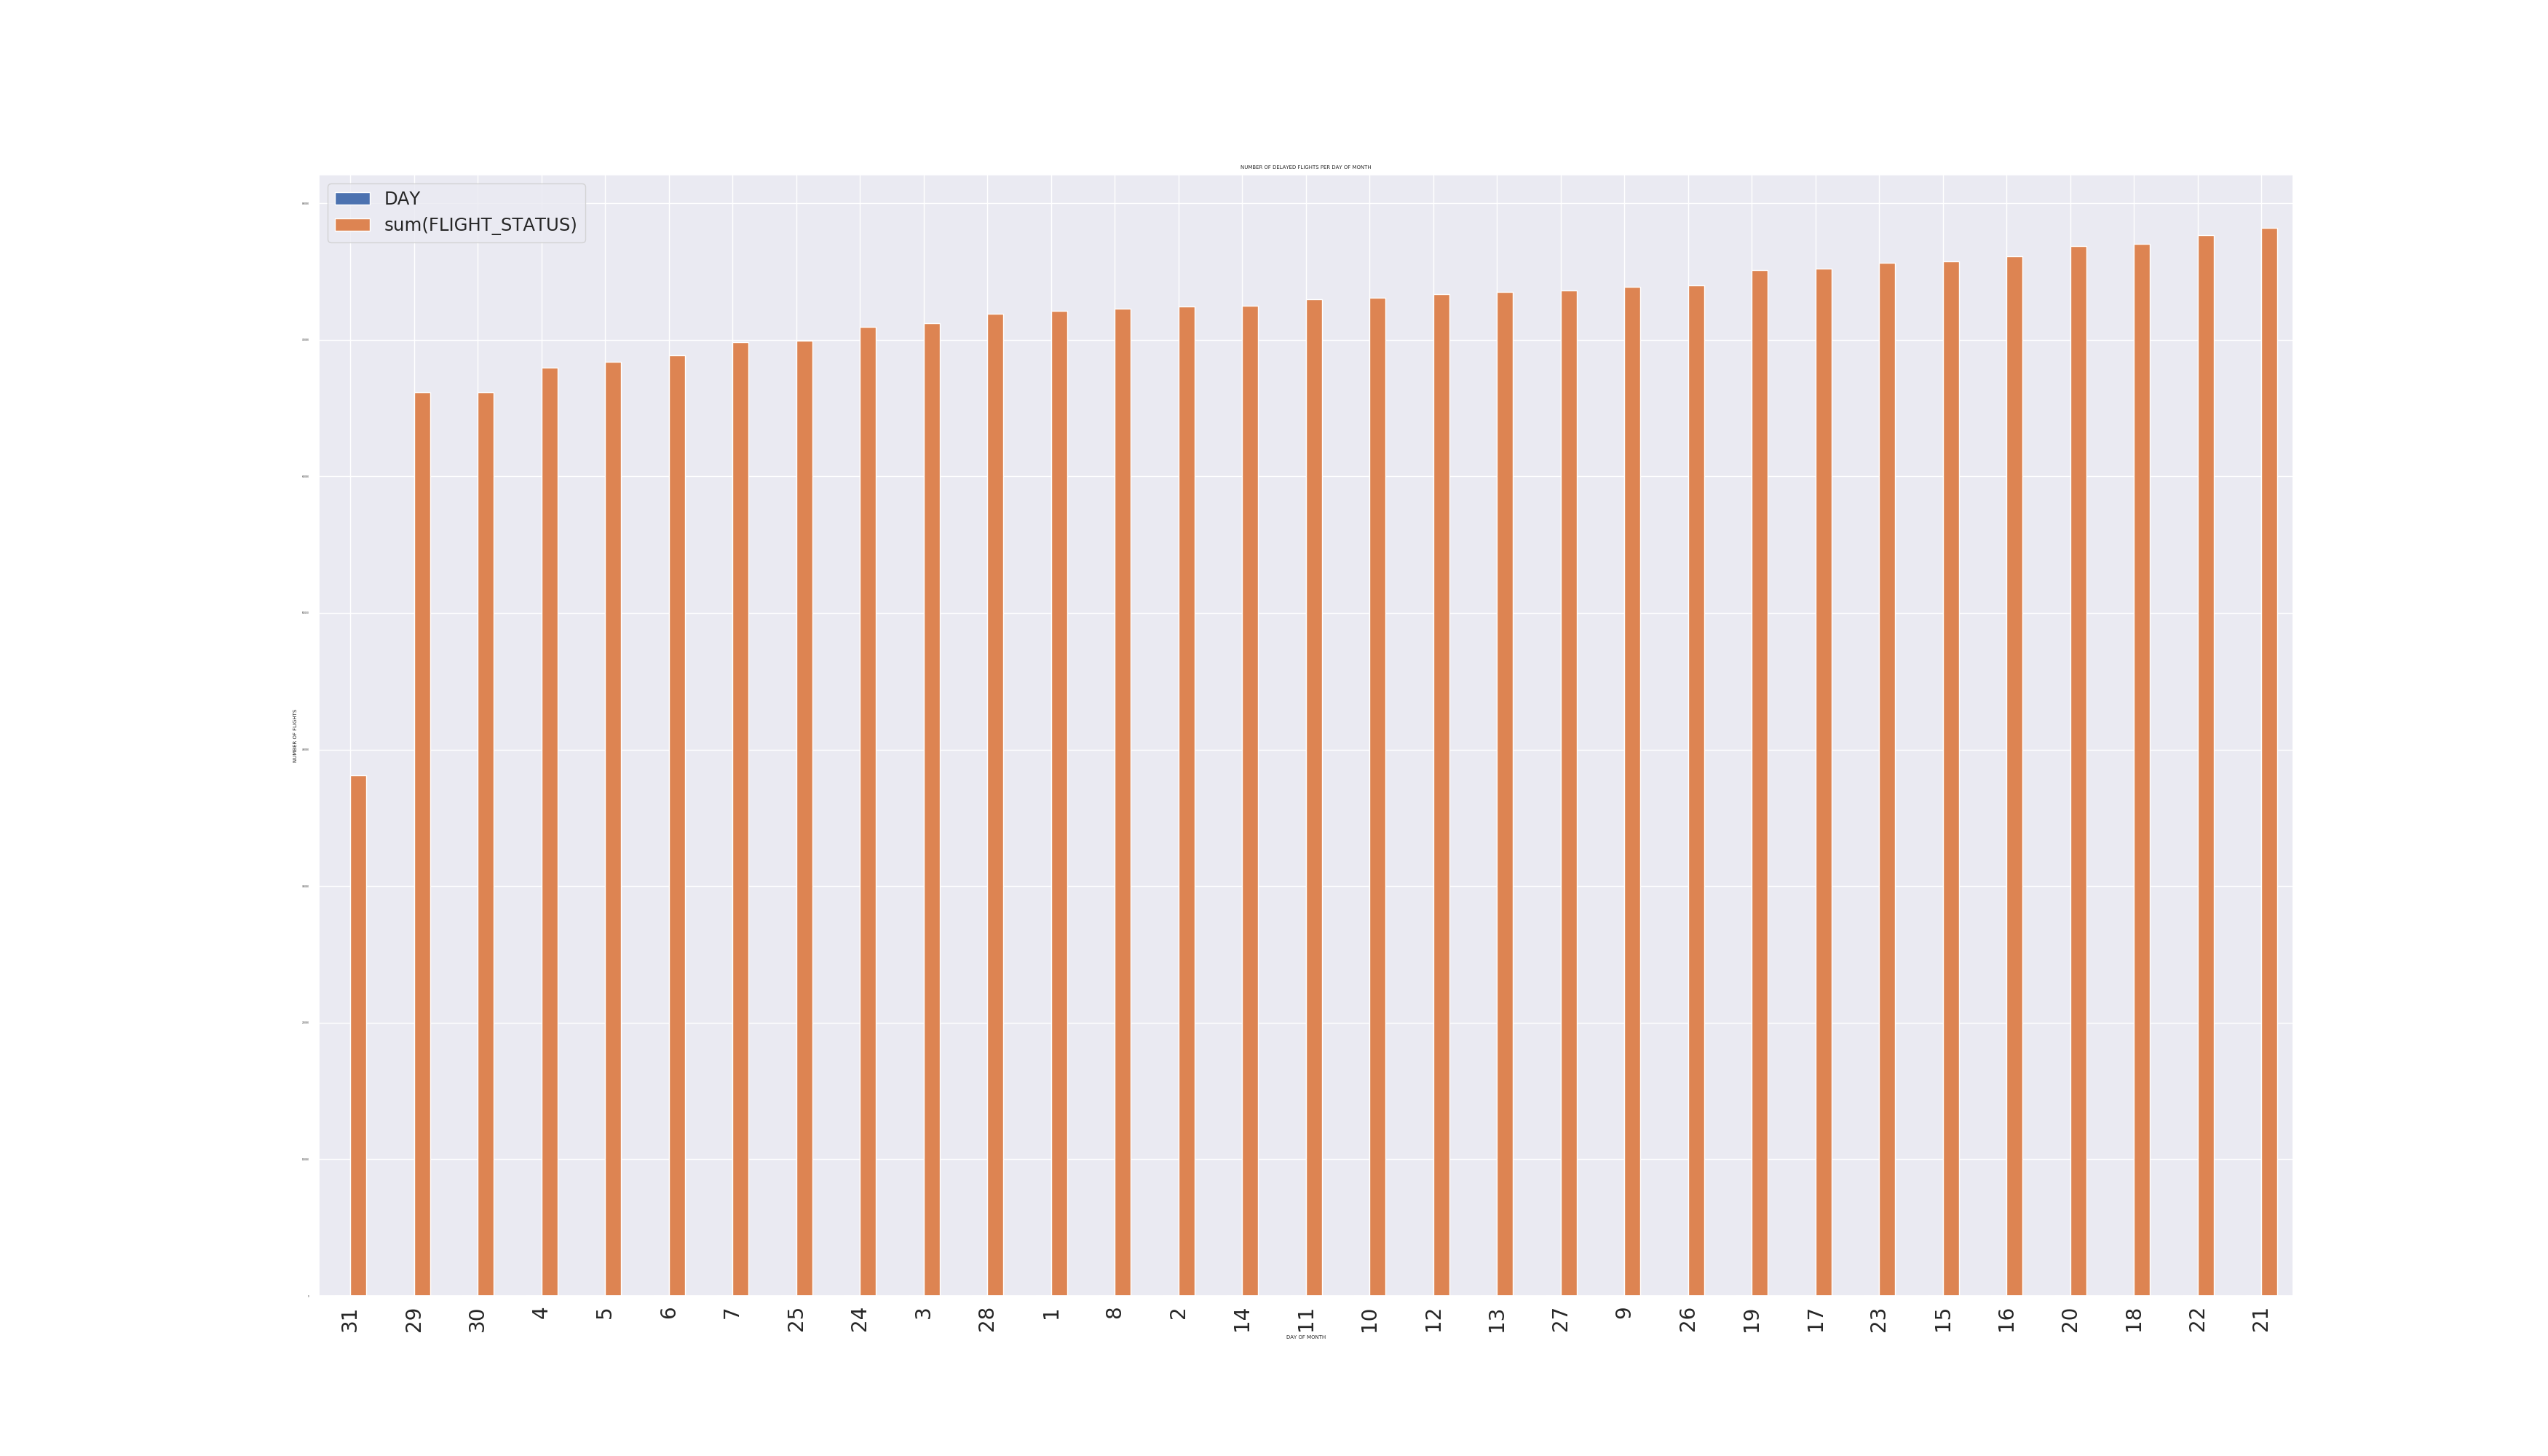

In [17]:
BestDay= dayDF.groupBy('DAY').agg(F.sum("FLIGHT_STATUS")).orderBy(col("sum(FLIGHT_STATUS)")).toPandas()
plt.figure(figsize=(18,50))
xpos = np.arange(len(BestDay.DAY))
BestDay.plot.bar()
plt.title('NUMBER OF DELAYED FLIGHTS PER DAY OF MONTH', fontsize=5)
plt.xlabel('DAY OF MONTH', fontsize=5)
plt.ylabel('NUMBER OF FLIGHTS', fontsize=5)
plt.rc('xtick',labelsize=2)
plt.rc('ytick',labelsize=2)
plt.xticks(xpos,BestDay['DAY'],rotation = 90)
plt.show();
%matplot plt

# Impact of Delays (Departure vs. Arrival Delay)

Impact of Delays (Departure vs. Arrival Delay)

In this visualization what We will try to do is analyze both, the departure and the arrival delay. We want to see which one of both has a bigger impact on the plane being late overall.

If the departure is on time and the flight is late on arrival, then this means that something else increased your elapse time, which is supposed to be the planned time needed for the flight trip.

This plot should also confirm the theory that some airlines when having a delay from their departure try to compensate by reducing their air time. 

In [18]:
dep_df=df.groupBy('OP_CARRIER').agg(F.mean("DEP_DELAY"))
dep_df=dep_df.toPandas()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [19]:
arr_df=df.groupBy('OP_CARRIER').agg(F.mean("ARR_DELAY"))
arr_df=arr_df.toPandas()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [27]:
mpl.rcParams.update(mpl.rcParamsDefault)
mpl.rcParams['hatch.linewidth'] = 1.8  

fig = plt.figure(1, figsize=(15,9))
ax = sns.barplot(x="avg(DEP_DELAY)", y="OP_CARRIER", data=dep_df, color="lightskyblue", ci=None)
ax = sns.barplot(x="avg(ARR_DELAY)", y="OP_CARRIER", data=arr_df, color="r", hatch = '///', alpha = 0.0, ci=None)
ax.yaxis.label.set_visible(False)
plt.title('Departure vs Arrival Delay')
plt.xlabel('Mean delay (min)', fontsize=14, labelpad=10)
plt.show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

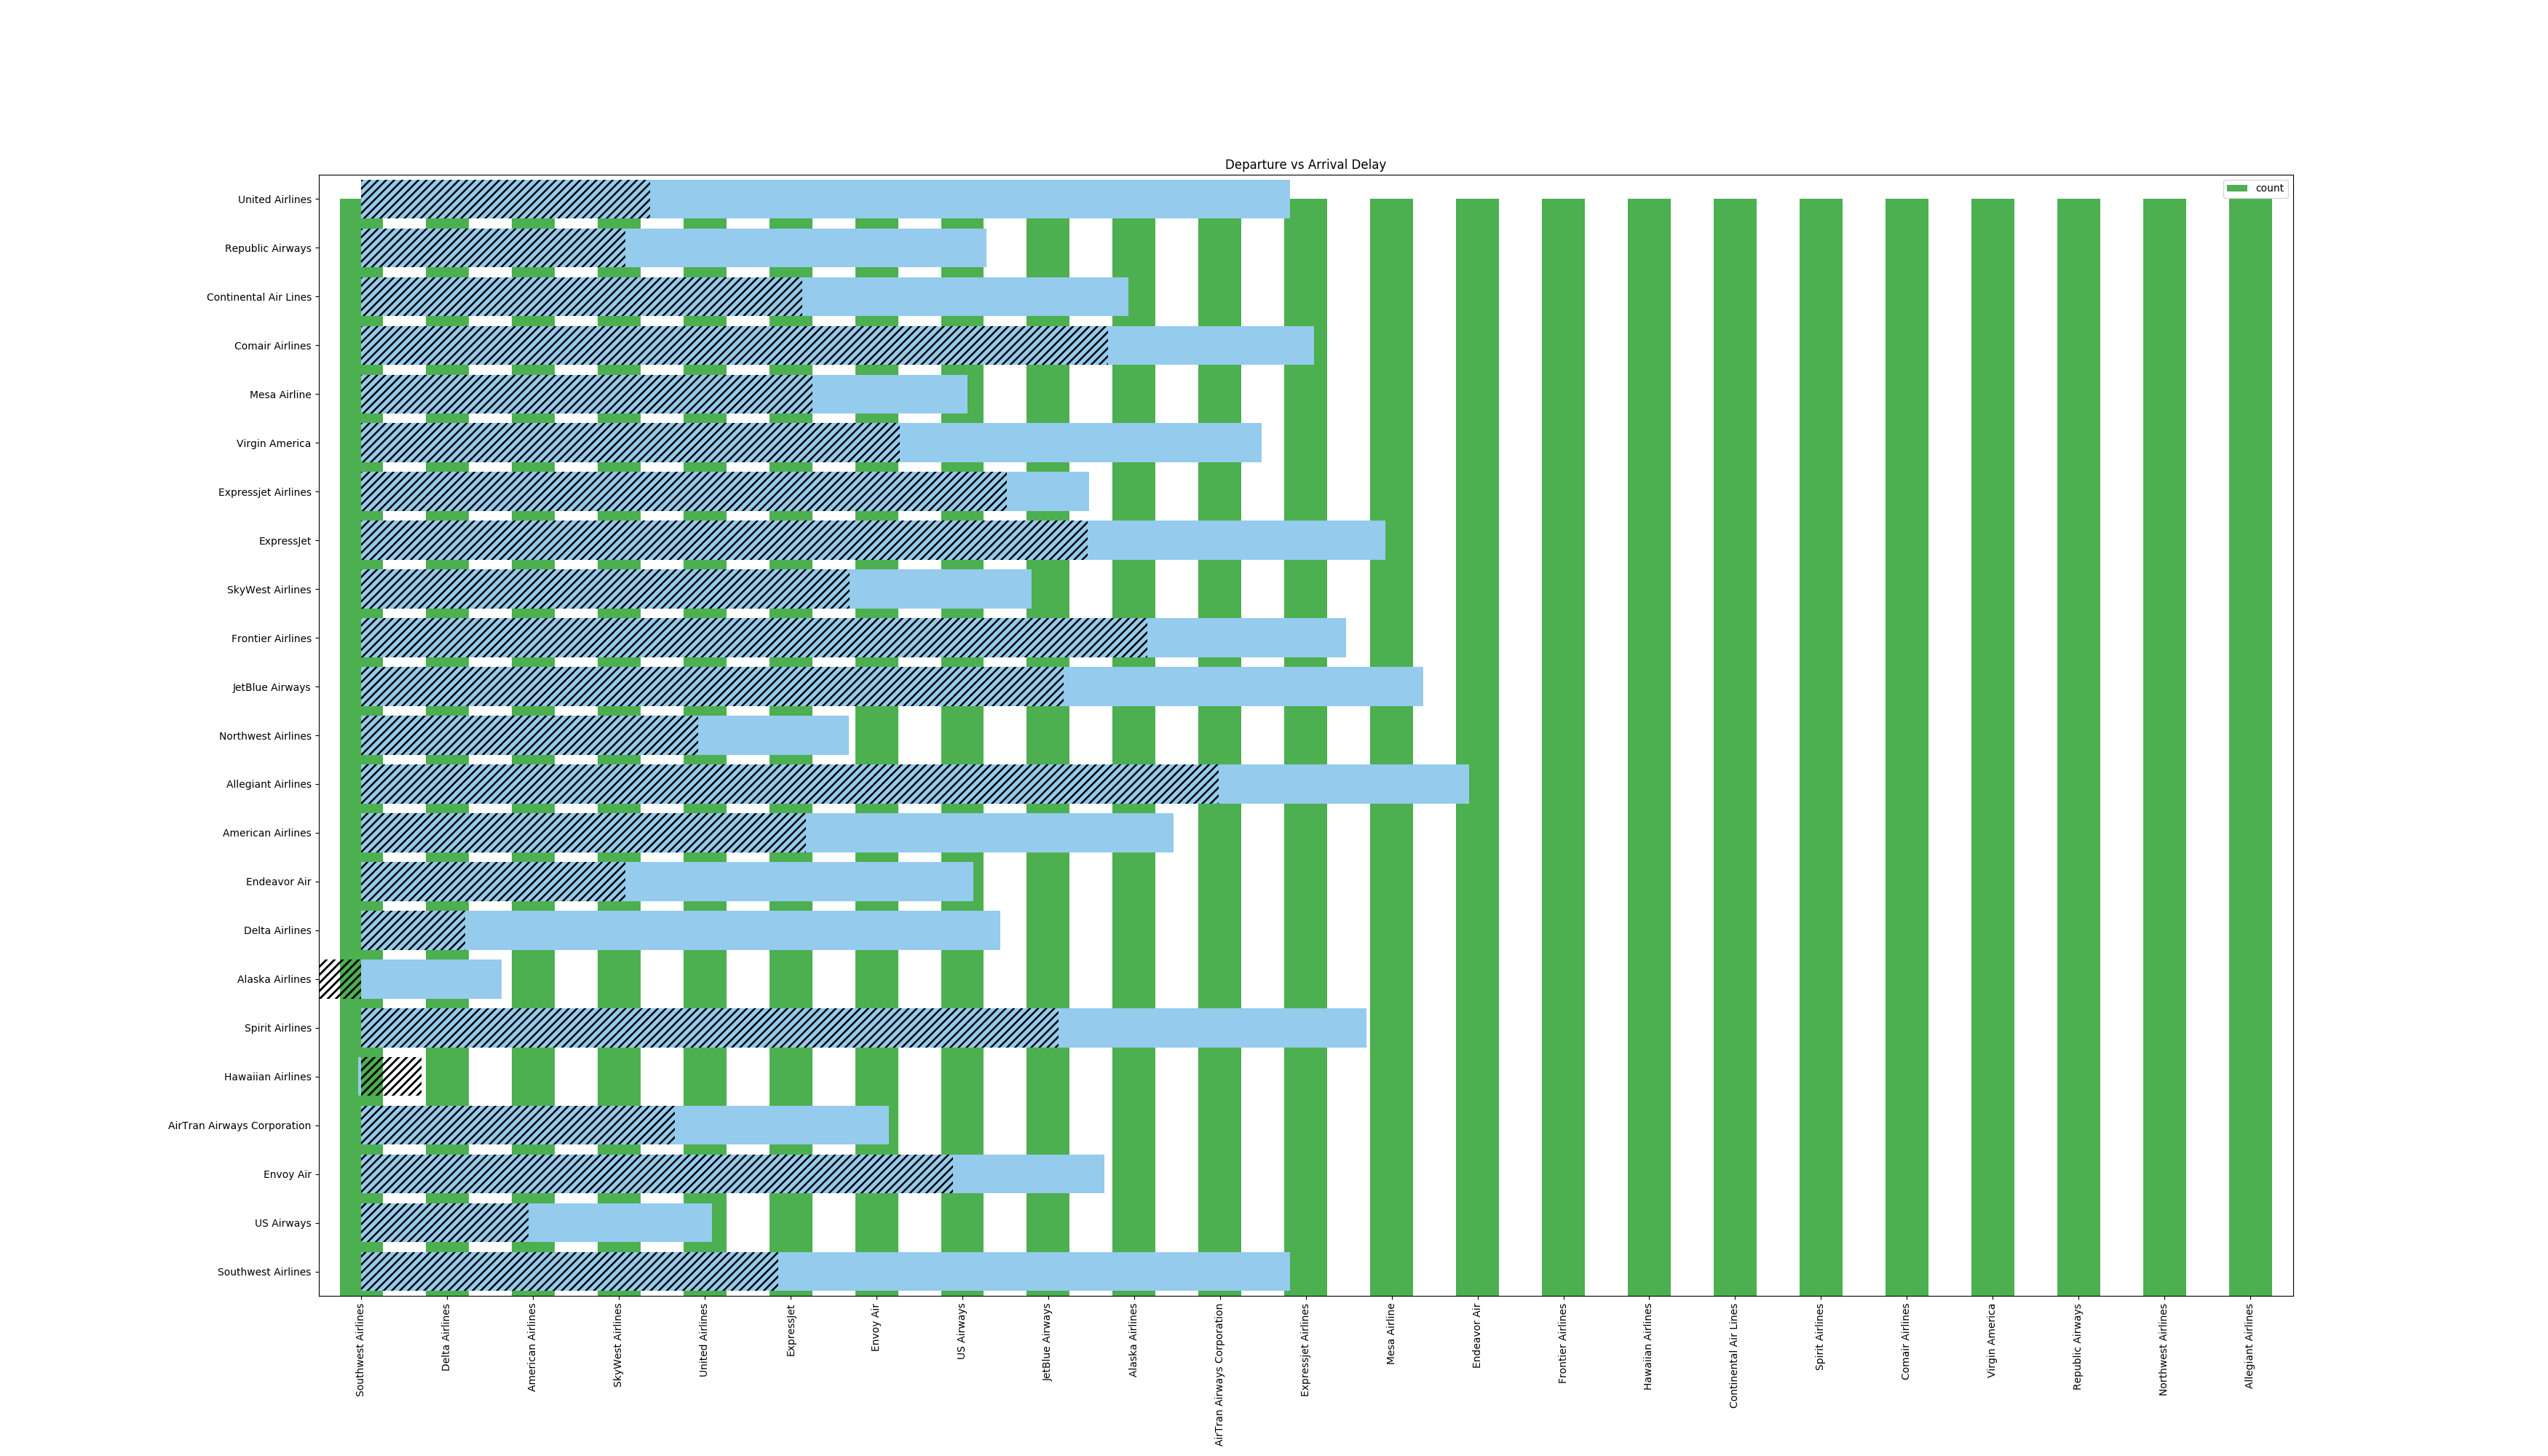

In [28]:
%matplot plt

The departure delay (DEP_DELAY) is the light blue color, whereas the arrival delay (ARR_DELAY) is the dashed line.

The results of the plot are quite interesting suggesting that the ARR_DELAYS are generally lower than the DEP_DELAYS, and as mentioned above, this suggests that the airlines try to adjust their flight speed to try and compensate for the late departure and reduce the ARR_DELAY.

Another interesting piece of information is related to Delta Airlines. Once again, the arrivals are negative. This means that even when they leave late, they are a good airline compensating by reducing the time of the flights to arrive on time or in average, earlier as the plot suggest.

# Most Popular Destination with Average Arrival Delays

In [21]:
Avg_Arr_Delay_Dest= df.groupBy('DEST').agg(F.mean("ARR_DELAY")).orderBy(col("avg(ARR_DELAY)").desc()).toPandas()



VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [22]:
Dest_Flights=df.groupBy('DEST').count().orderBy(col('count').desc()).limit(30).toPandas()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [23]:
Merged_Df= pd.merge(Dest_Flights, Avg_Arr_Delay_Dest, on='DEST')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [24]:
Top_Avg_Arr_Delay_Dest=Merged_Df.drop('count',axis=1)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [25]:
Merged_Df = Merged_Df.set_index('DEST')
xpos = np.arange(len(Merged_Df.index))
fig = plt.figure(figsize=(15,7)) # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as a
width = .3

Dest_Flights.plot(kind='bar',color='grey',ax=ax, width=width, position=0)
Top_Avg_Arr_Delay_Dest.plot(kind='bar',color='red', ax=ax2, width=width, position=1)

plt.hlines(y=4.90, xmin=-1, xmax=30, colors='b', linestyles='dashed', label='cutoff')

#ax.grid(None, axis=1)
ax2.grid(None)

ax.set_title('MOST POPULAR DESTINATIONS vs AVERAGE ARRIVAL DELAY', fontsize=18)
ax.set_ylabel('NUMBER OF FLIGHTS', fontsize=16)
ax2.set_ylabel('AVERAGE ARRIVAL DELAY (mins)')
ax.set_xlabel('DESTINATION CITIES', fontsize=16)
plt.xticks(xpos,Merged_Df.index,rotation = 90)
plt.show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

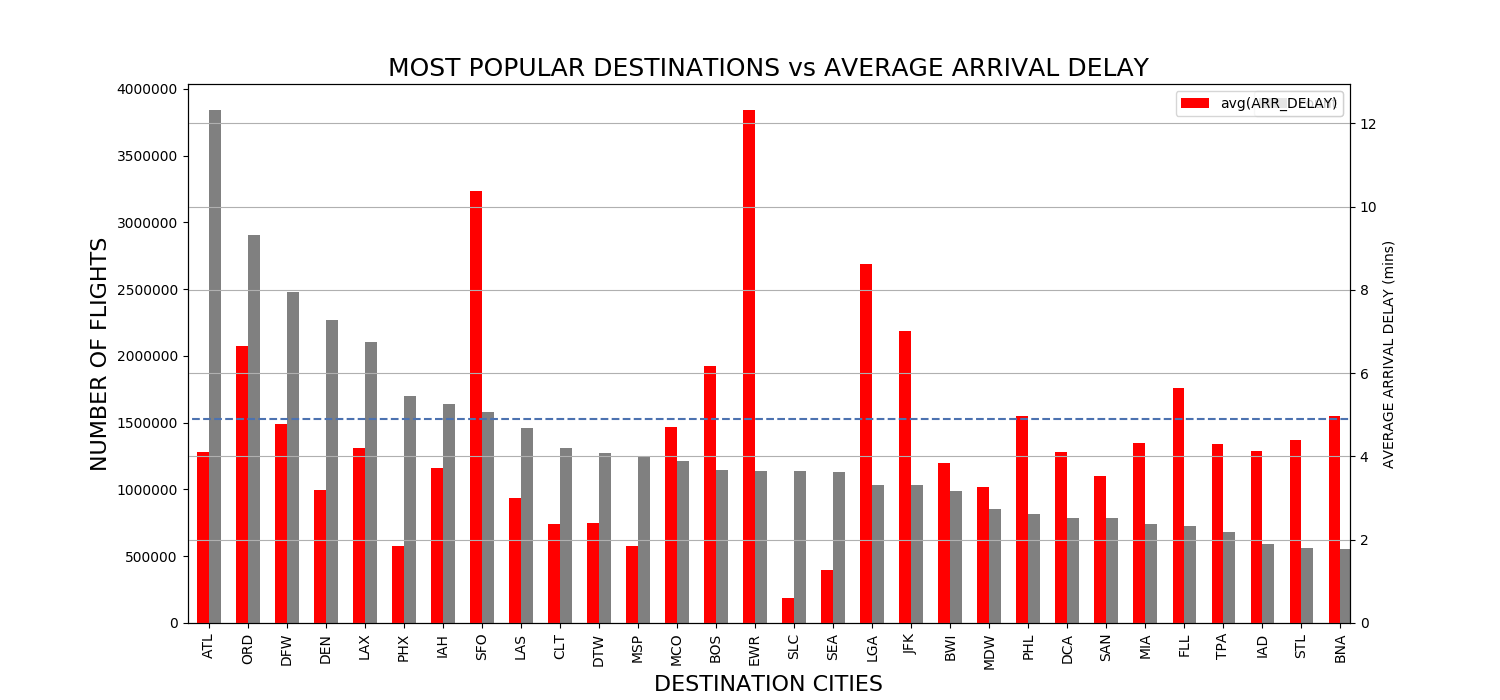

In [26]:
%matplot plt

# Departure Cities with the most Delayed Departure Flights

In [29]:
Avg_Dep_Delay_Origin= df.groupBy('ORIGIN').agg(F.mean("DEP_DELAY")).orderBy(col("avg(DEP_DELAY)").desc()).toPandas()
Origin_Flights=df.groupBy('ORIGIN').count().orderBy(col('count').desc()).limit(30).toPandas()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [37]:
Merged_Df2= pd.merge(Origin_Flights, Avg_Dep_Delay_Origin, on='ORIGIN')
Top_Avg_Dep_Delay_Origin=Merged_Df2.drop('count',axis=1)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [38]:
Merged_Df2 = Merged_Df2.set_index('ORIGIN')
xpos = np.arange(len(Merged_Df2.index))
fig = plt.figure(figsize=(15,7)) # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis
width = .3

Origin_Flights.plot(kind='bar',color='red',ax=ax, width=width, position=0)
Top_Avg_Dep_Delay_Origin.plot(kind='bar',color='grey', ax=ax2, width=width, position=1)

plt.hlines(y=10.345, xmin=-1, xmax=30, colors='b', linestyles='dashed', label='cutoff')

#ax.grid(None, axis=1)
ax2.grid(None)

ax.set_title('MOST POPULAR DESTINATIONS WITH THE LONGEST DEPARTURE DELAYS', fontsize=18)
ax.set_ylabel('NUMBER OF FLIGHTS', fontsize=16)
ax2.set_ylabel('AVERAGE DEPARTURE DELAY (mins)')
ax.set_xlabel('TOP 30 CITIES', fontsize=16)
plt.xticks(xpos,Merged_Df2.index,rotation = 90)
plt.show()


VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

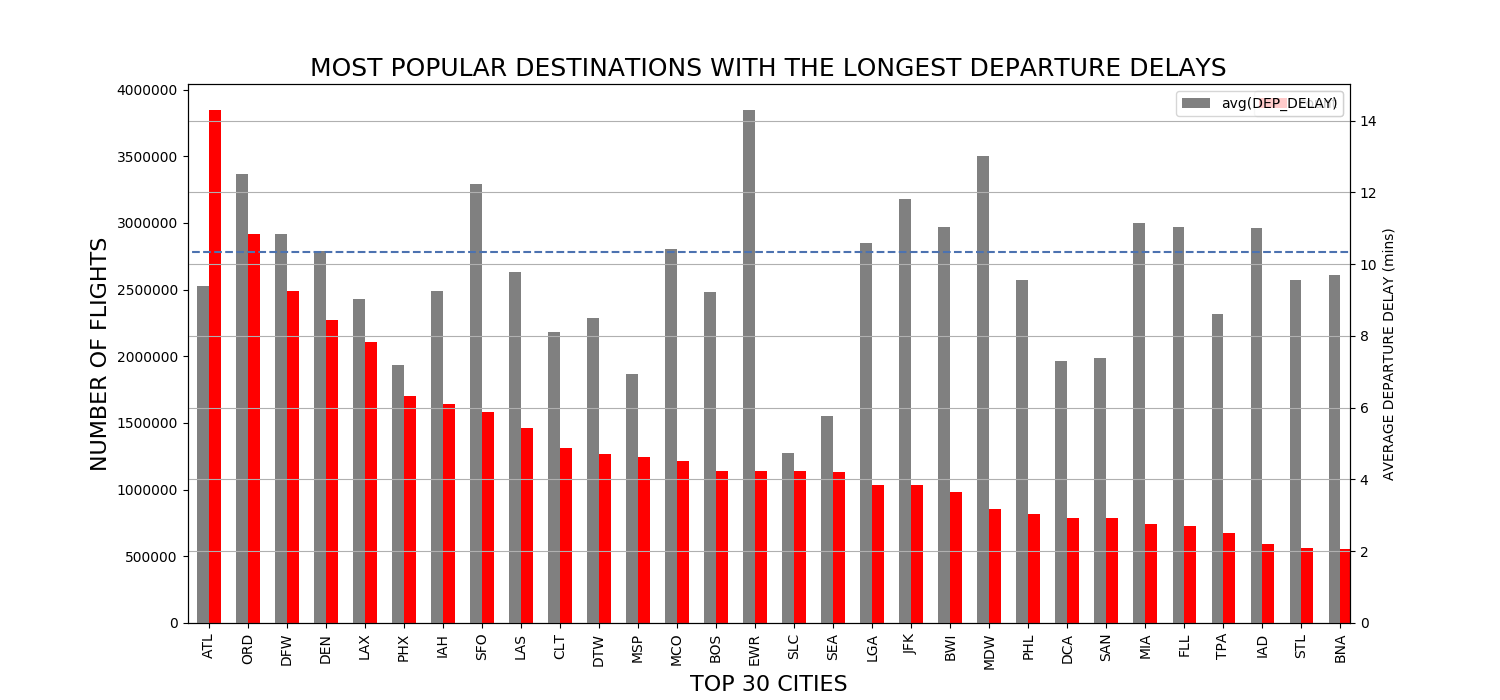

In [39]:
%matplot plt

# Number of Destinations by Airlines
From this plot we get to know the total number of destinations each airlines travel to.

This will help us find out which Airlines connect to most cities and we will try to find out its relation with their delay time

In [40]:
cities=df.groupBy("OP_CARRIER","DEST").count()
cities_1=cities.select("OP_CARRIER").toPandas()
print((cities_1.count(), len(cities_1.columns)))
cities_airline = cities_1.OP_CARRIER.value_counts().rename_axis('OP_CARRIER').reset_index(name='NUMBER_CITIES')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

(OP_CARRIER    2758
dtype: int64, 1)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

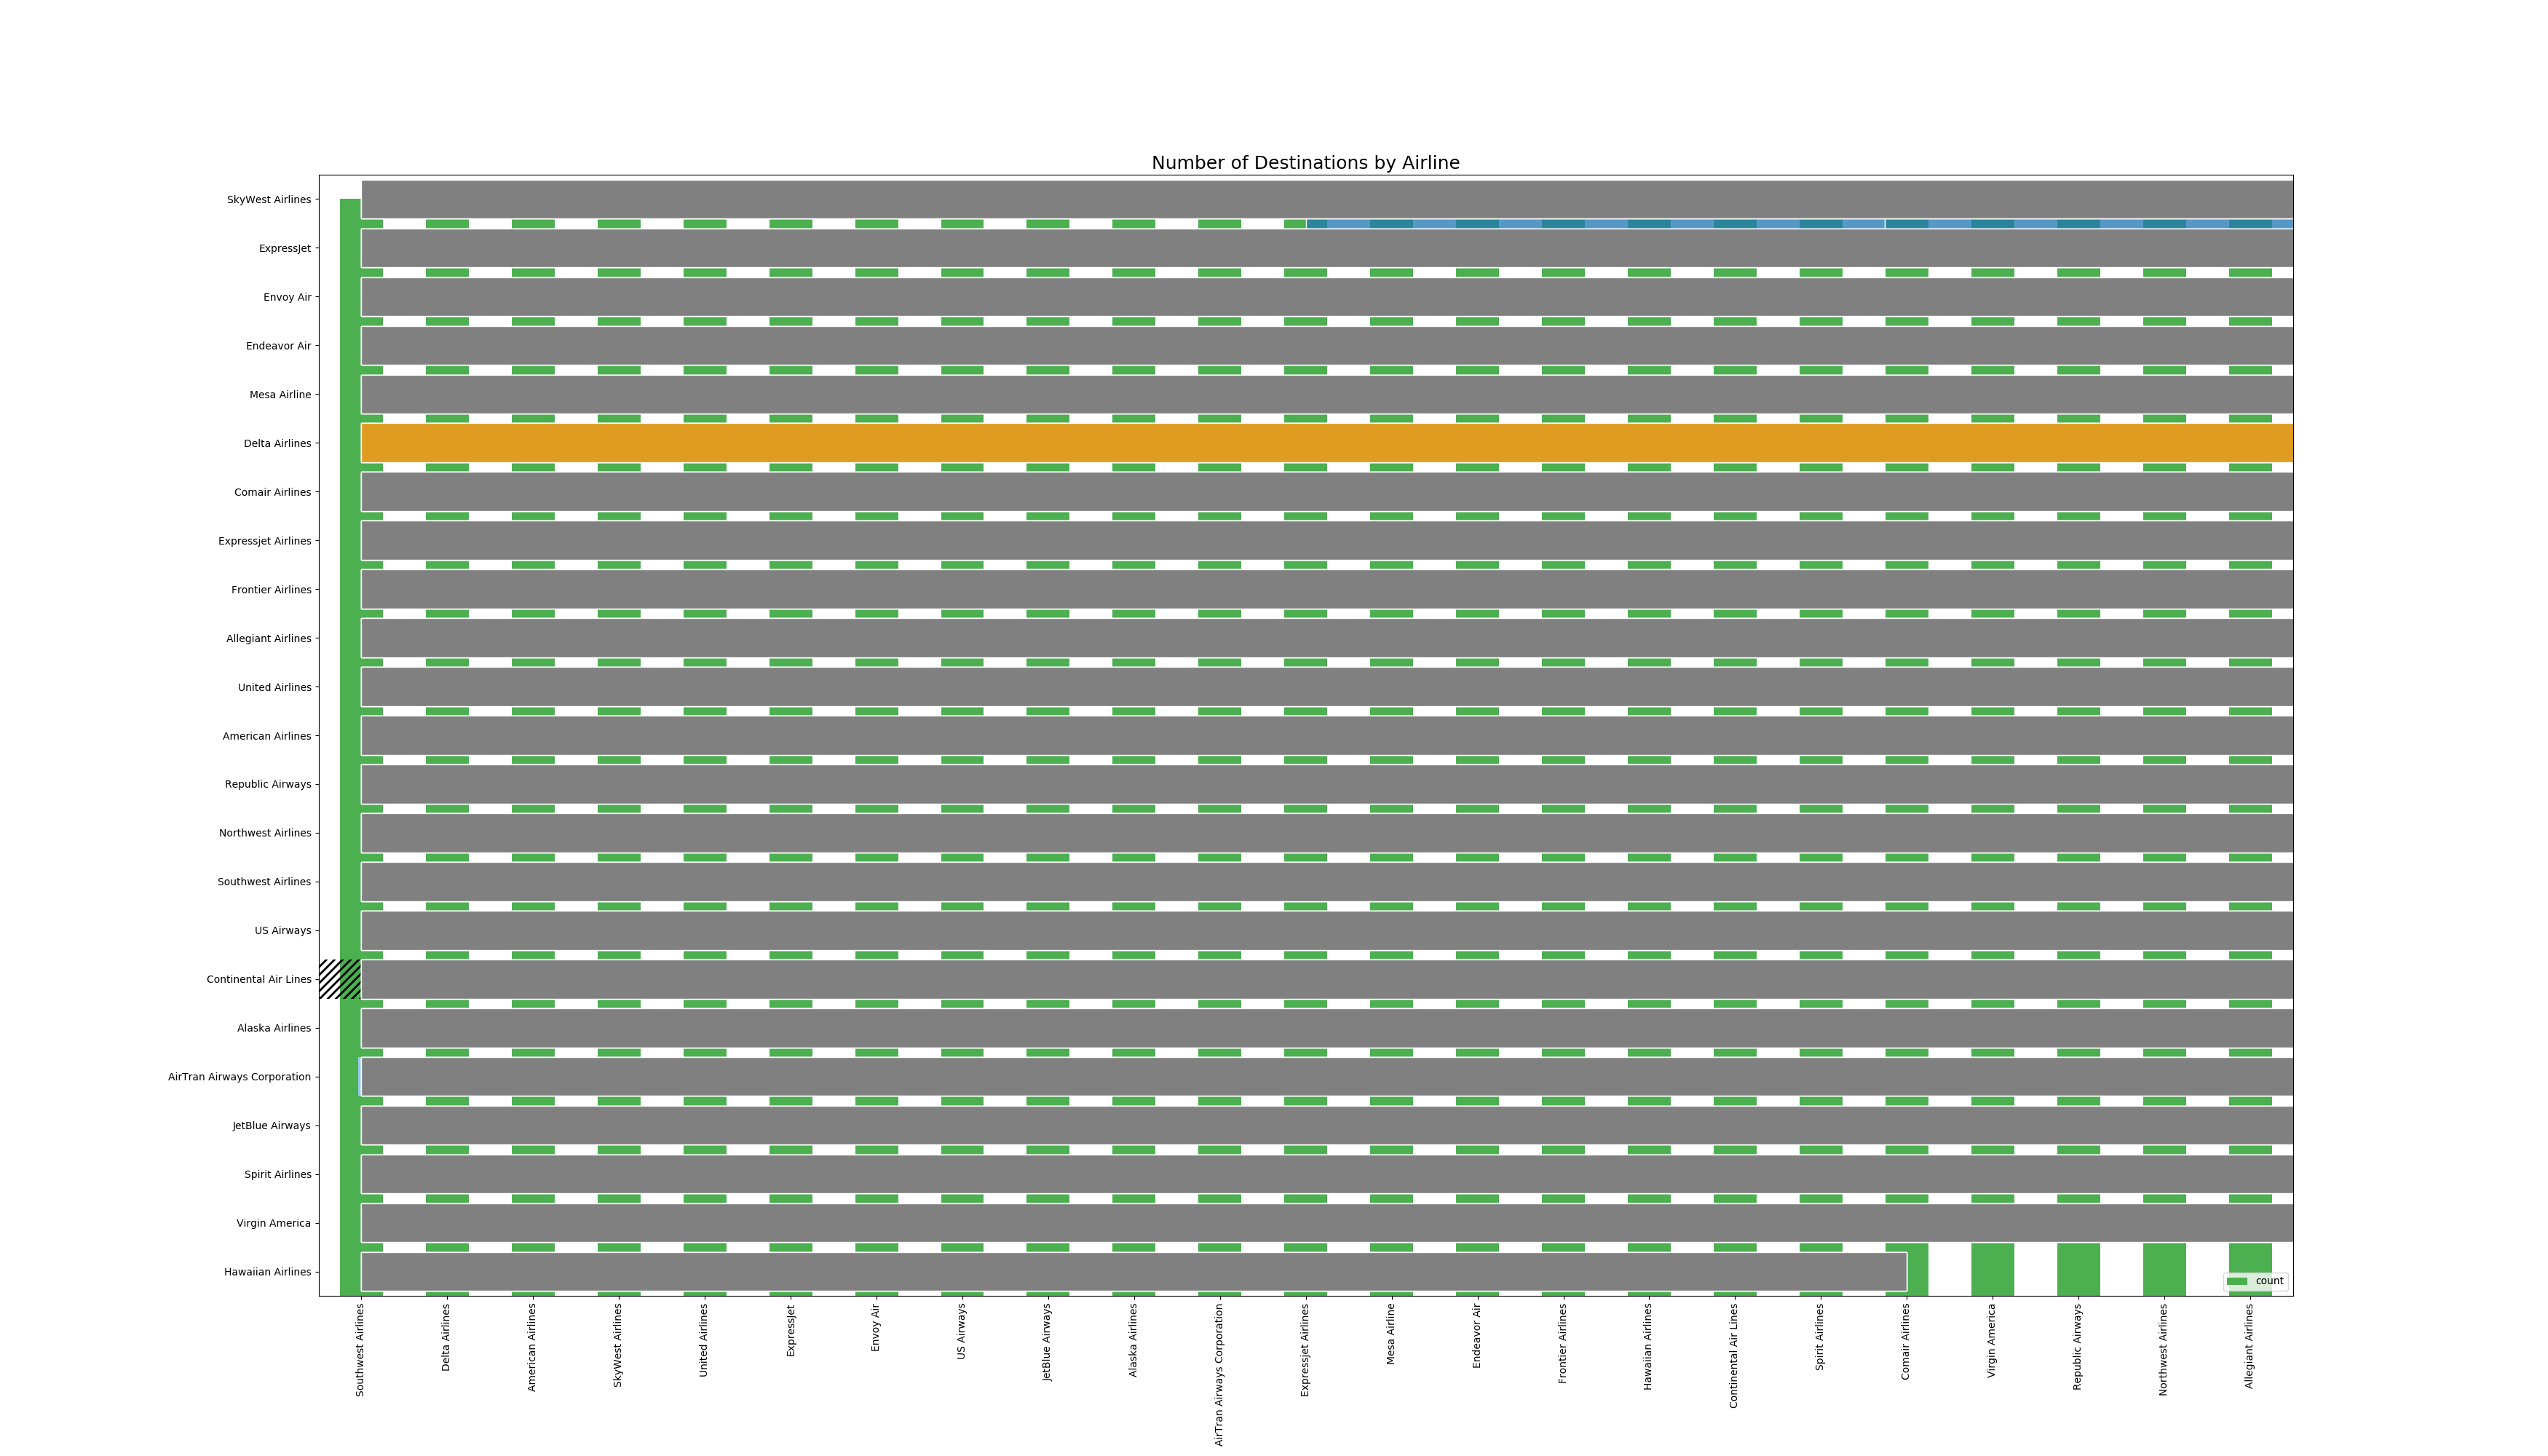

In [52]:
sns.set_style('darkgrid')

fig = plt.figure(1, figsize=(15,9))
ax = sns.barplot(x="NUMBER_CITIES", y="OP_CARRIER", data=cities_airline, palette=["grey" if y!='Delta Airlines' else "orange" for y in cities_airline.OP_CARRIER])
plt.title('Number of Destinations by Airline', fontsize=18)
plt.xlabel('Number of Destinations', fontsize=14, labelpad=10);
plt.show();
%matplot plt

# Histogram for distance

In [42]:
df.describe(['YEAR']).show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-------+------------------+
|summary|              YEAR|
+-------+------------------+
|  count|          60431020|
|   mean| 2013.483984698587|
| stddev|2.9282157233355544|
|    min|              2009|
|    max|              2018|
+-------+------------------+

In [43]:
df_09=df.select("DISTANCE").where(col("YEAR")==2009).toPandas()
df_10=df.select("DISTANCE").where(col("YEAR")==2010).toPandas()
df_11=df.select("DISTANCE").where(col("YEAR")==2011).toPandas()
df_12=df.select("DISTANCE").where(col("YEAR")==2012).toPandas()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [46]:
fig = plt.figure(figsize=(18, 18))
sns.set(font_scale=1.6)
sub1 = fig.add_subplot(221) # instead of plt.subplot(5, 2, 1)
sub1.set_title('DISTRIBUTION OF DISTANCE OF YEAR 2009', fontsize=18, color="black")
sub1 = sns.histplot(data=df_09,x="DISTANCE")

sub2 = fig.add_subplot(222)
sub2.set_title('DISTRIBUTION OF DISTANCE OF YEAR 2010', fontsize=18, color="black")
sub2 = sns.histplot(data=df_10,x="DISTANCE")

sub3 = fig.add_subplot(223)
sub3.set_title('DISTRIBUTION OF DISTANCE OF YEAR 2011', fontsize=18, color="black")
sub3 = sns.histplot(data=df_11,x="DISTANCE")

sub4 = fig.add_subplot(224)
sub4.set_title('DISTRIBUTION OF DISTANCE OF YEAR 2012', fontsize=18, color="black")
sub4 = sns.histplot(data=df_12,x="DISTANCE")

fig.tight_layout()

plt.show();

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

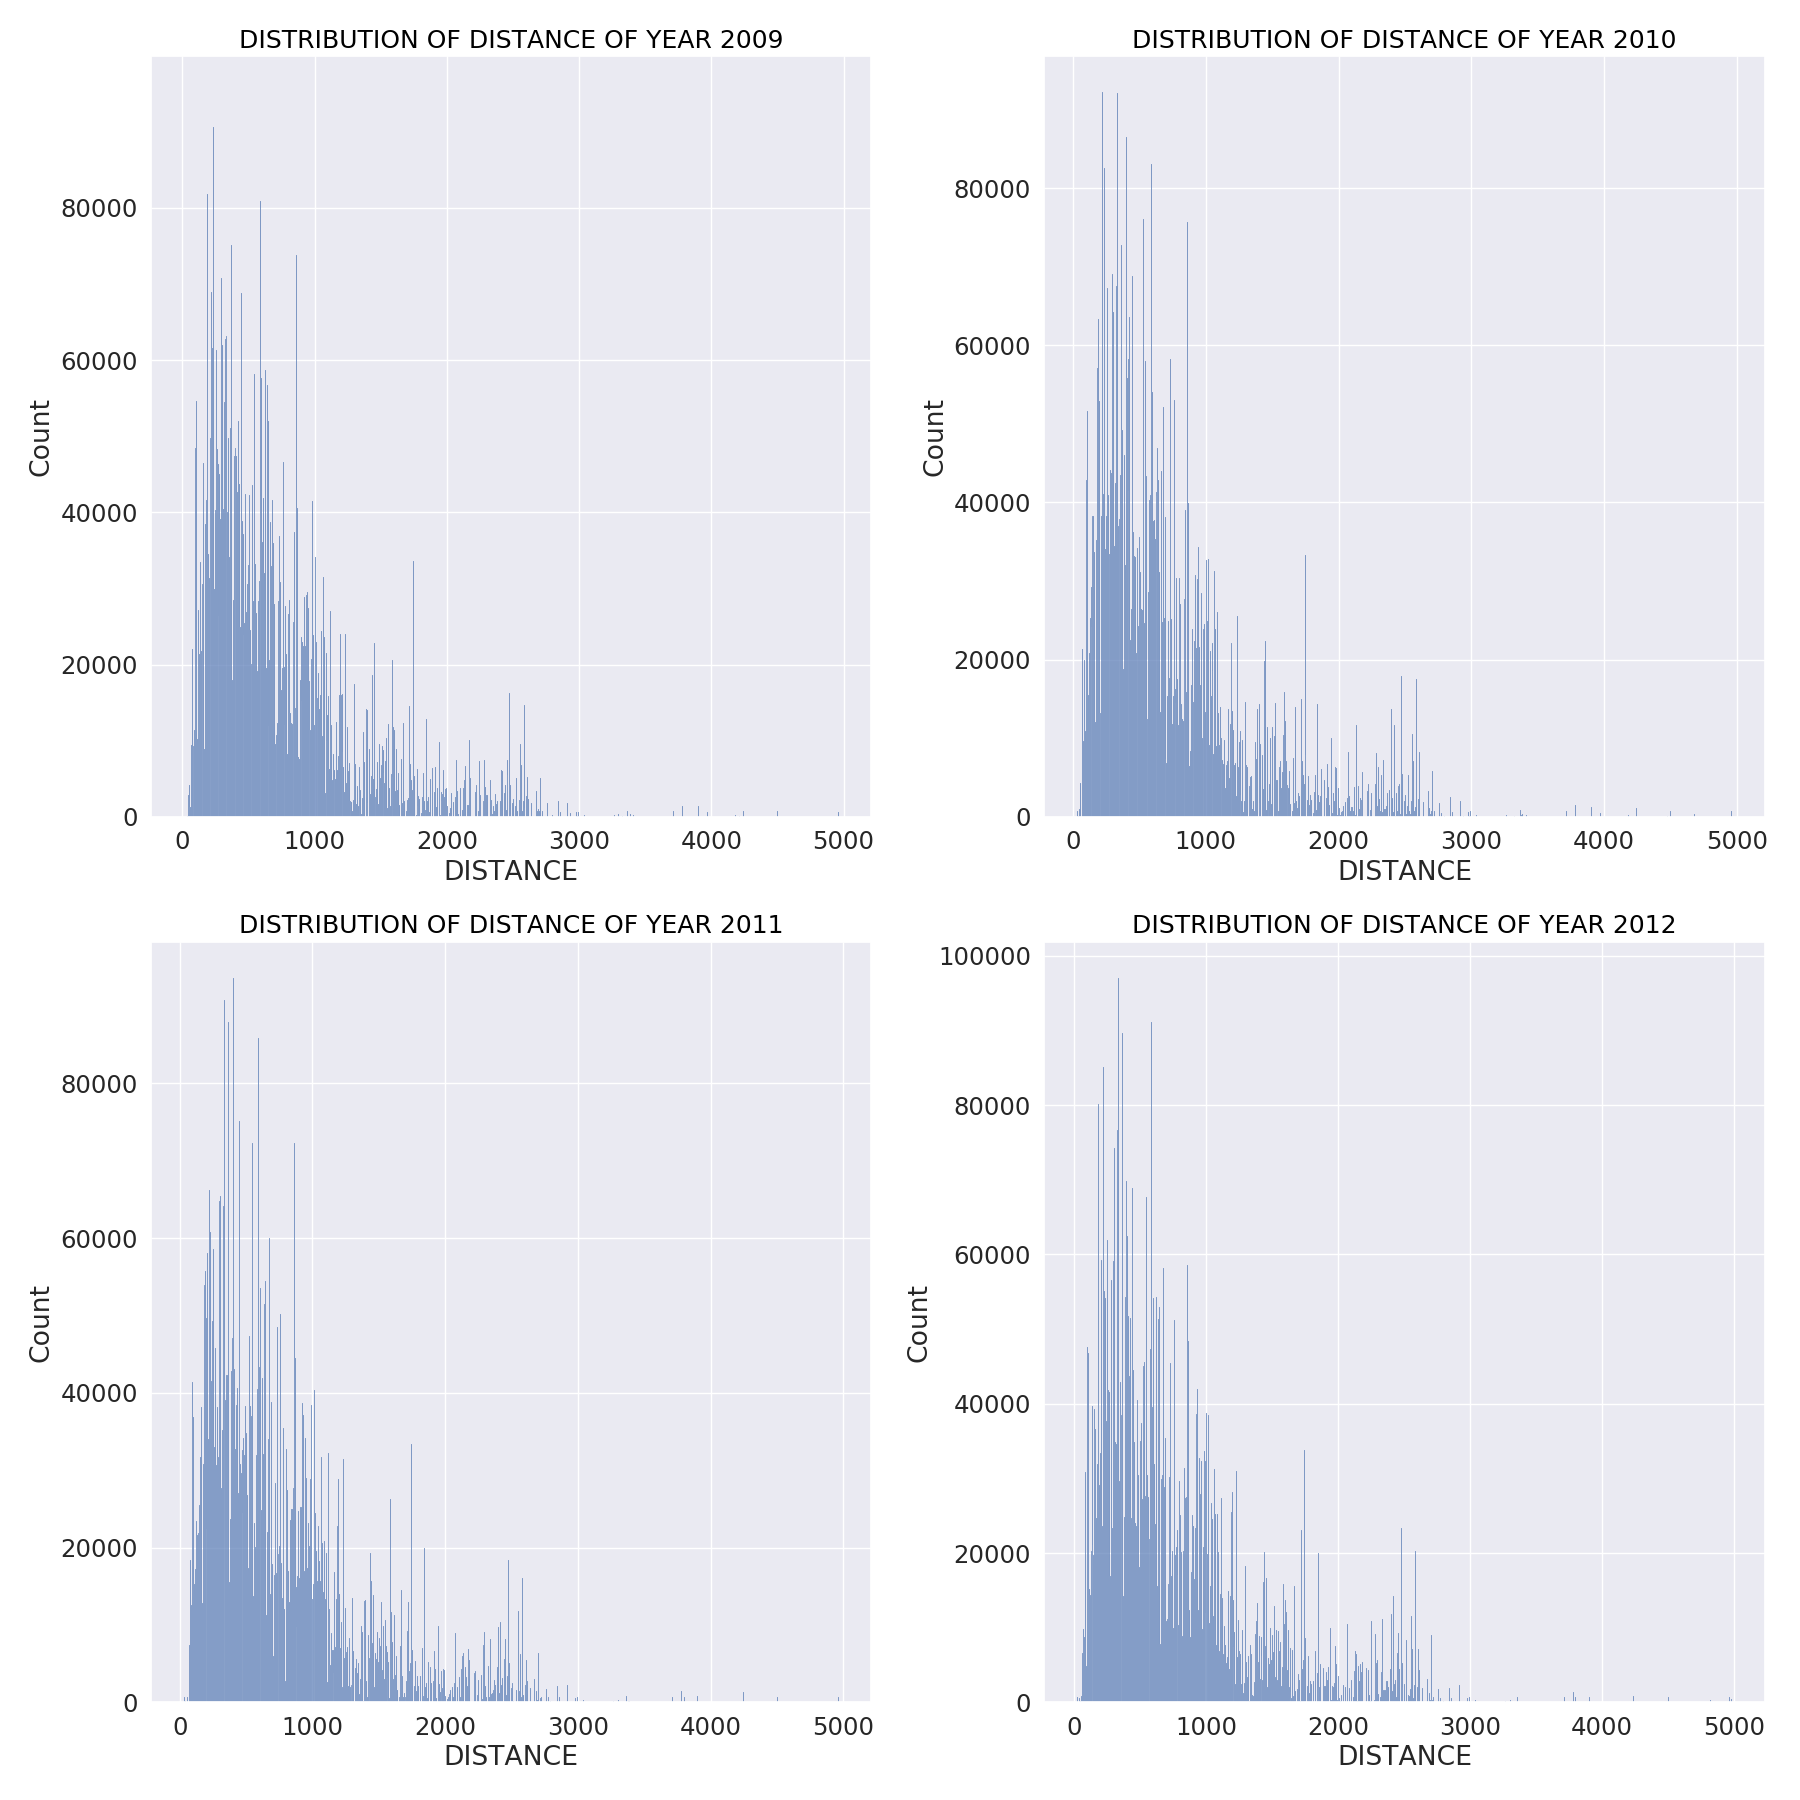

In [47]:
%matplot plt

In [48]:
dfA_09=df.select("AIR_TIME").where(col("YEAR")==2009).toPandas()
dfA_10=df.select("AIR_TIME").where(col("YEAR")==2010).toPandas()
dfA_11=df.select("AIR_TIME").where(col("YEAR")==2011).toPandas()
dfA_12=df.select("AIR_TIME").where(col("YEAR")==2012).toPandas()


VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

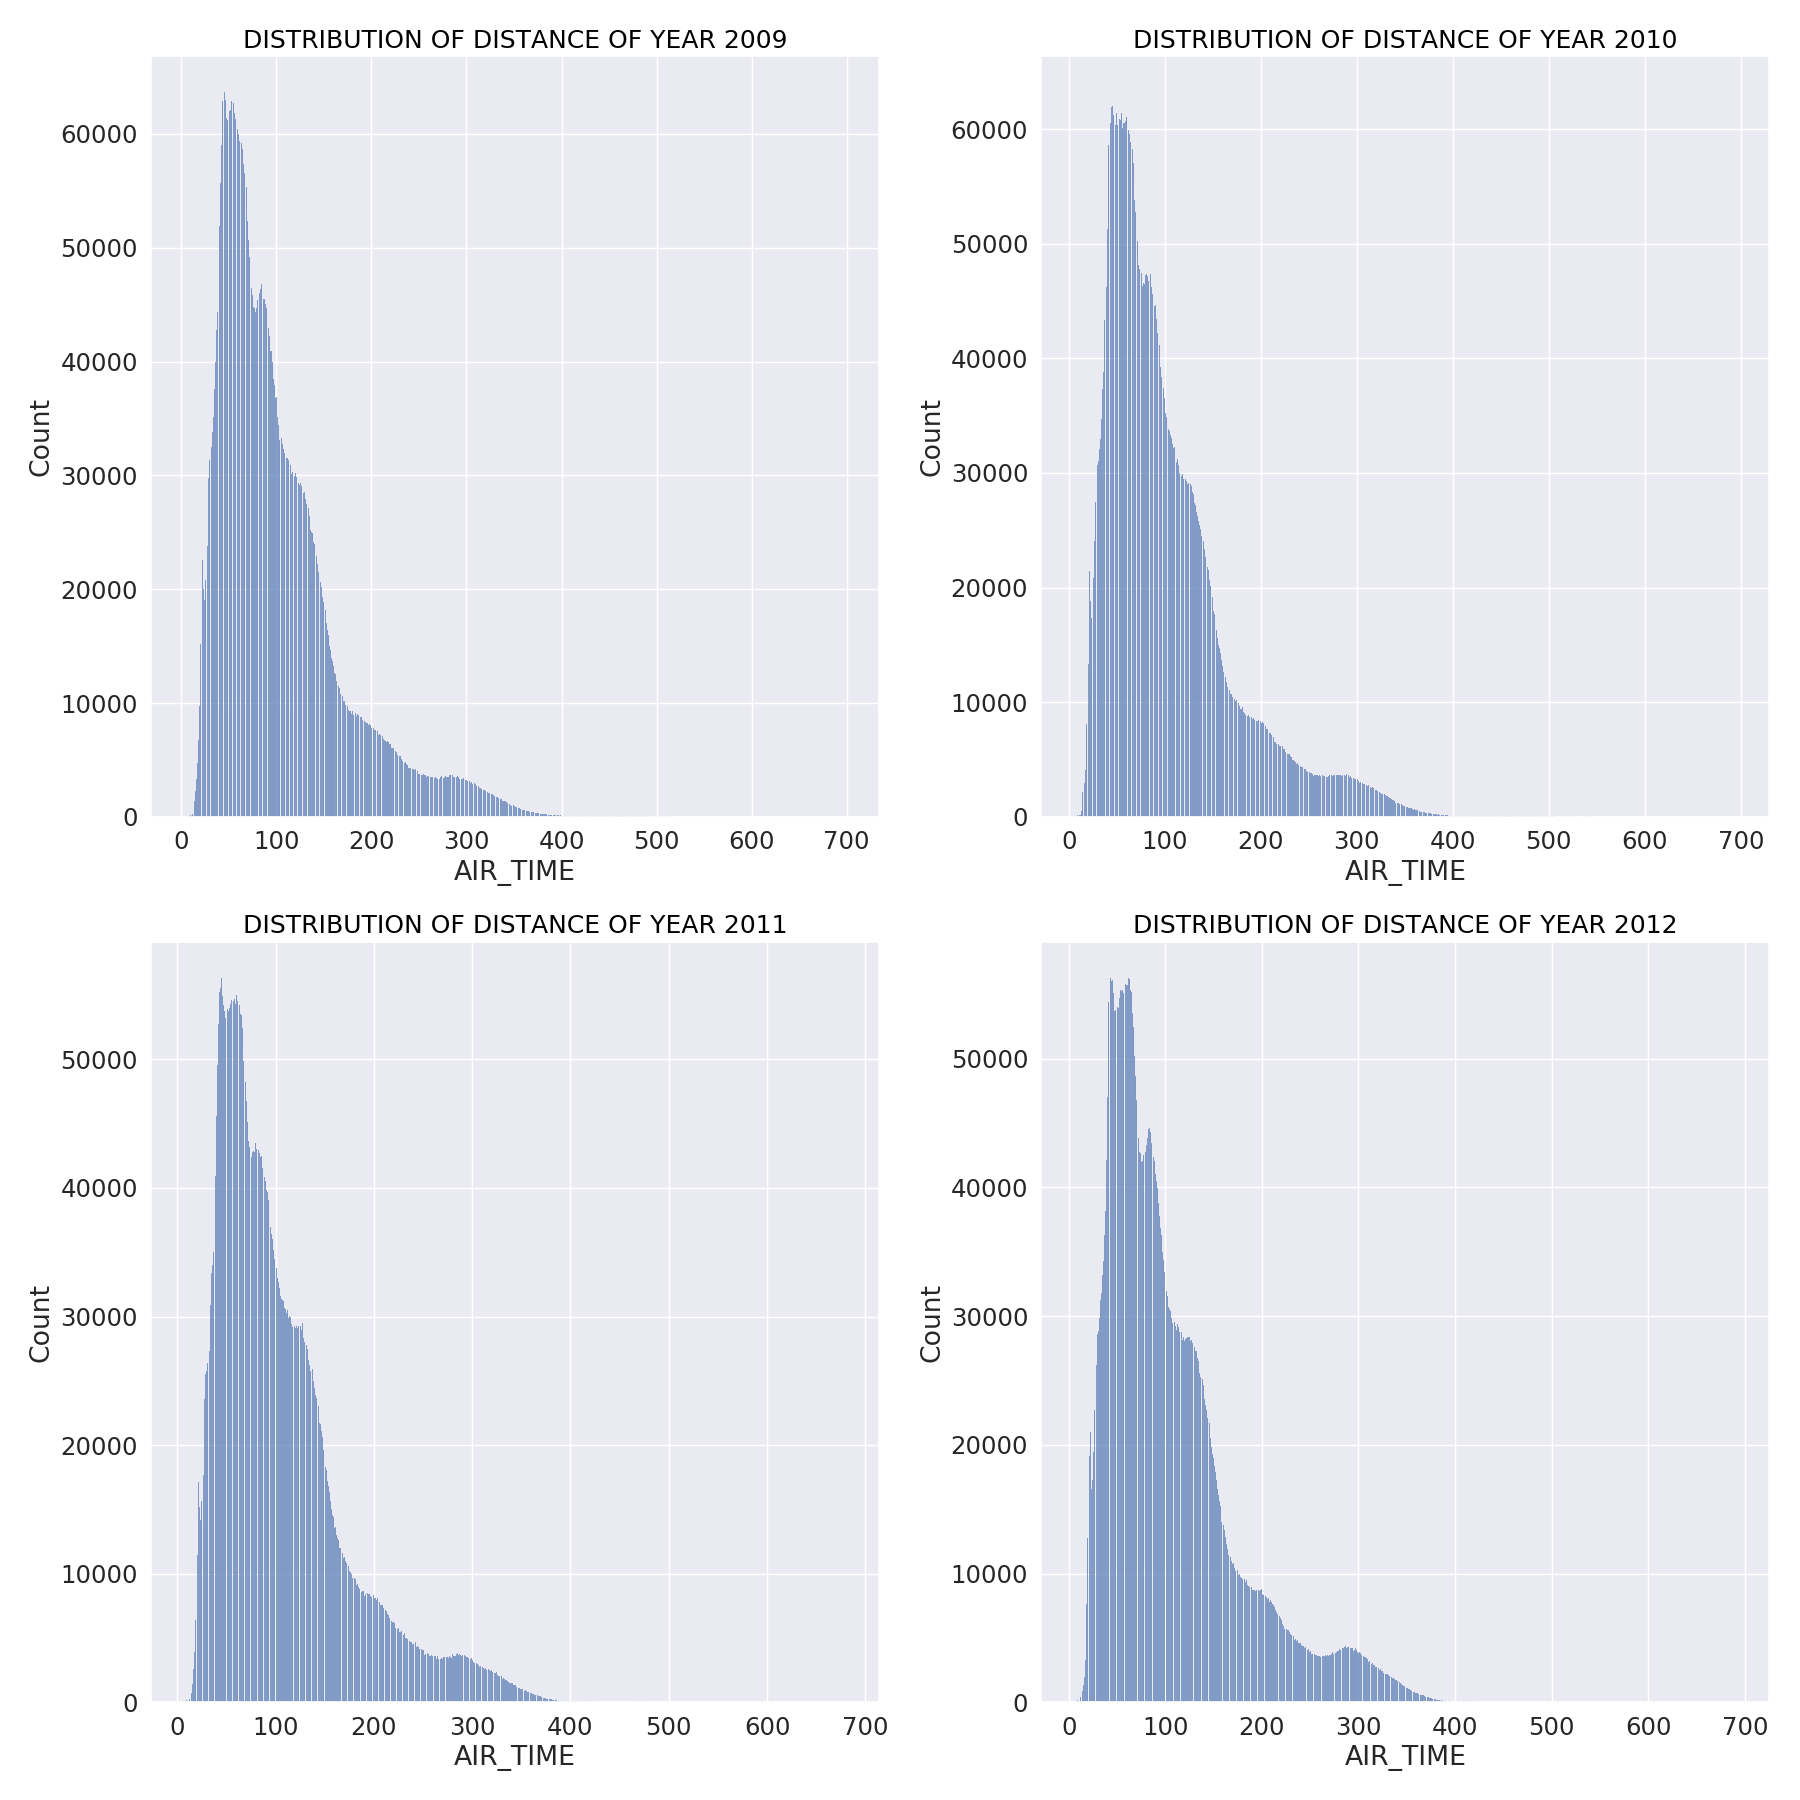

In [49]:
fig = plt.figure(figsize=(18, 18))
sns.set(font_scale=1.6)
sub1 = fig.add_subplot(221) # instead of plt.subplot(5, 2, 1)
sub1.set_title('DISTRIBUTION OF DISTANCE OF YEAR 2009', fontsize=18, color="black")
sub1 = sns.histplot(data=dfA_09,x="AIR_TIME")

sub2 = fig.add_subplot(222)
sub2.set_title('DISTRIBUTION OF DISTANCE OF YEAR 2010', fontsize=18, color="black")
sub2 = sns.histplot(data=dfA_10,x="AIR_TIME")

sub3 = fig.add_subplot(223)
sub3.set_title('DISTRIBUTION OF DISTANCE OF YEAR 2011', fontsize=18, color="black")
sub3 = sns.histplot(data=dfA_11,x="AIR_TIME")

sub4 = fig.add_subplot(224)
sub4.set_title('DISTRIBUTION OF DISTANCE OF YEAR 2012', fontsize=18, color="black")
sub4 = sns.histplot(data=dfA_12,x="AIR_TIME")

fig.tight_layout()

plt.show();
%matplot plt

In [54]:
dfE_09=df.select("CRS_ELAPSED_TIME").where(col("YEAR")==2009).toPandas()
dfE_10=df.select("CRS_ELAPSED_TIME").where(col("YEAR")==2010).toPandas()
dfE_11=df.select("CRS_ELAPSED_TIME").where(col("YEAR")==2011).toPandas()
dfE_12=df.select("CRS_ELAPSED_TIME").where(col("YEAR")==2012).toPandas()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

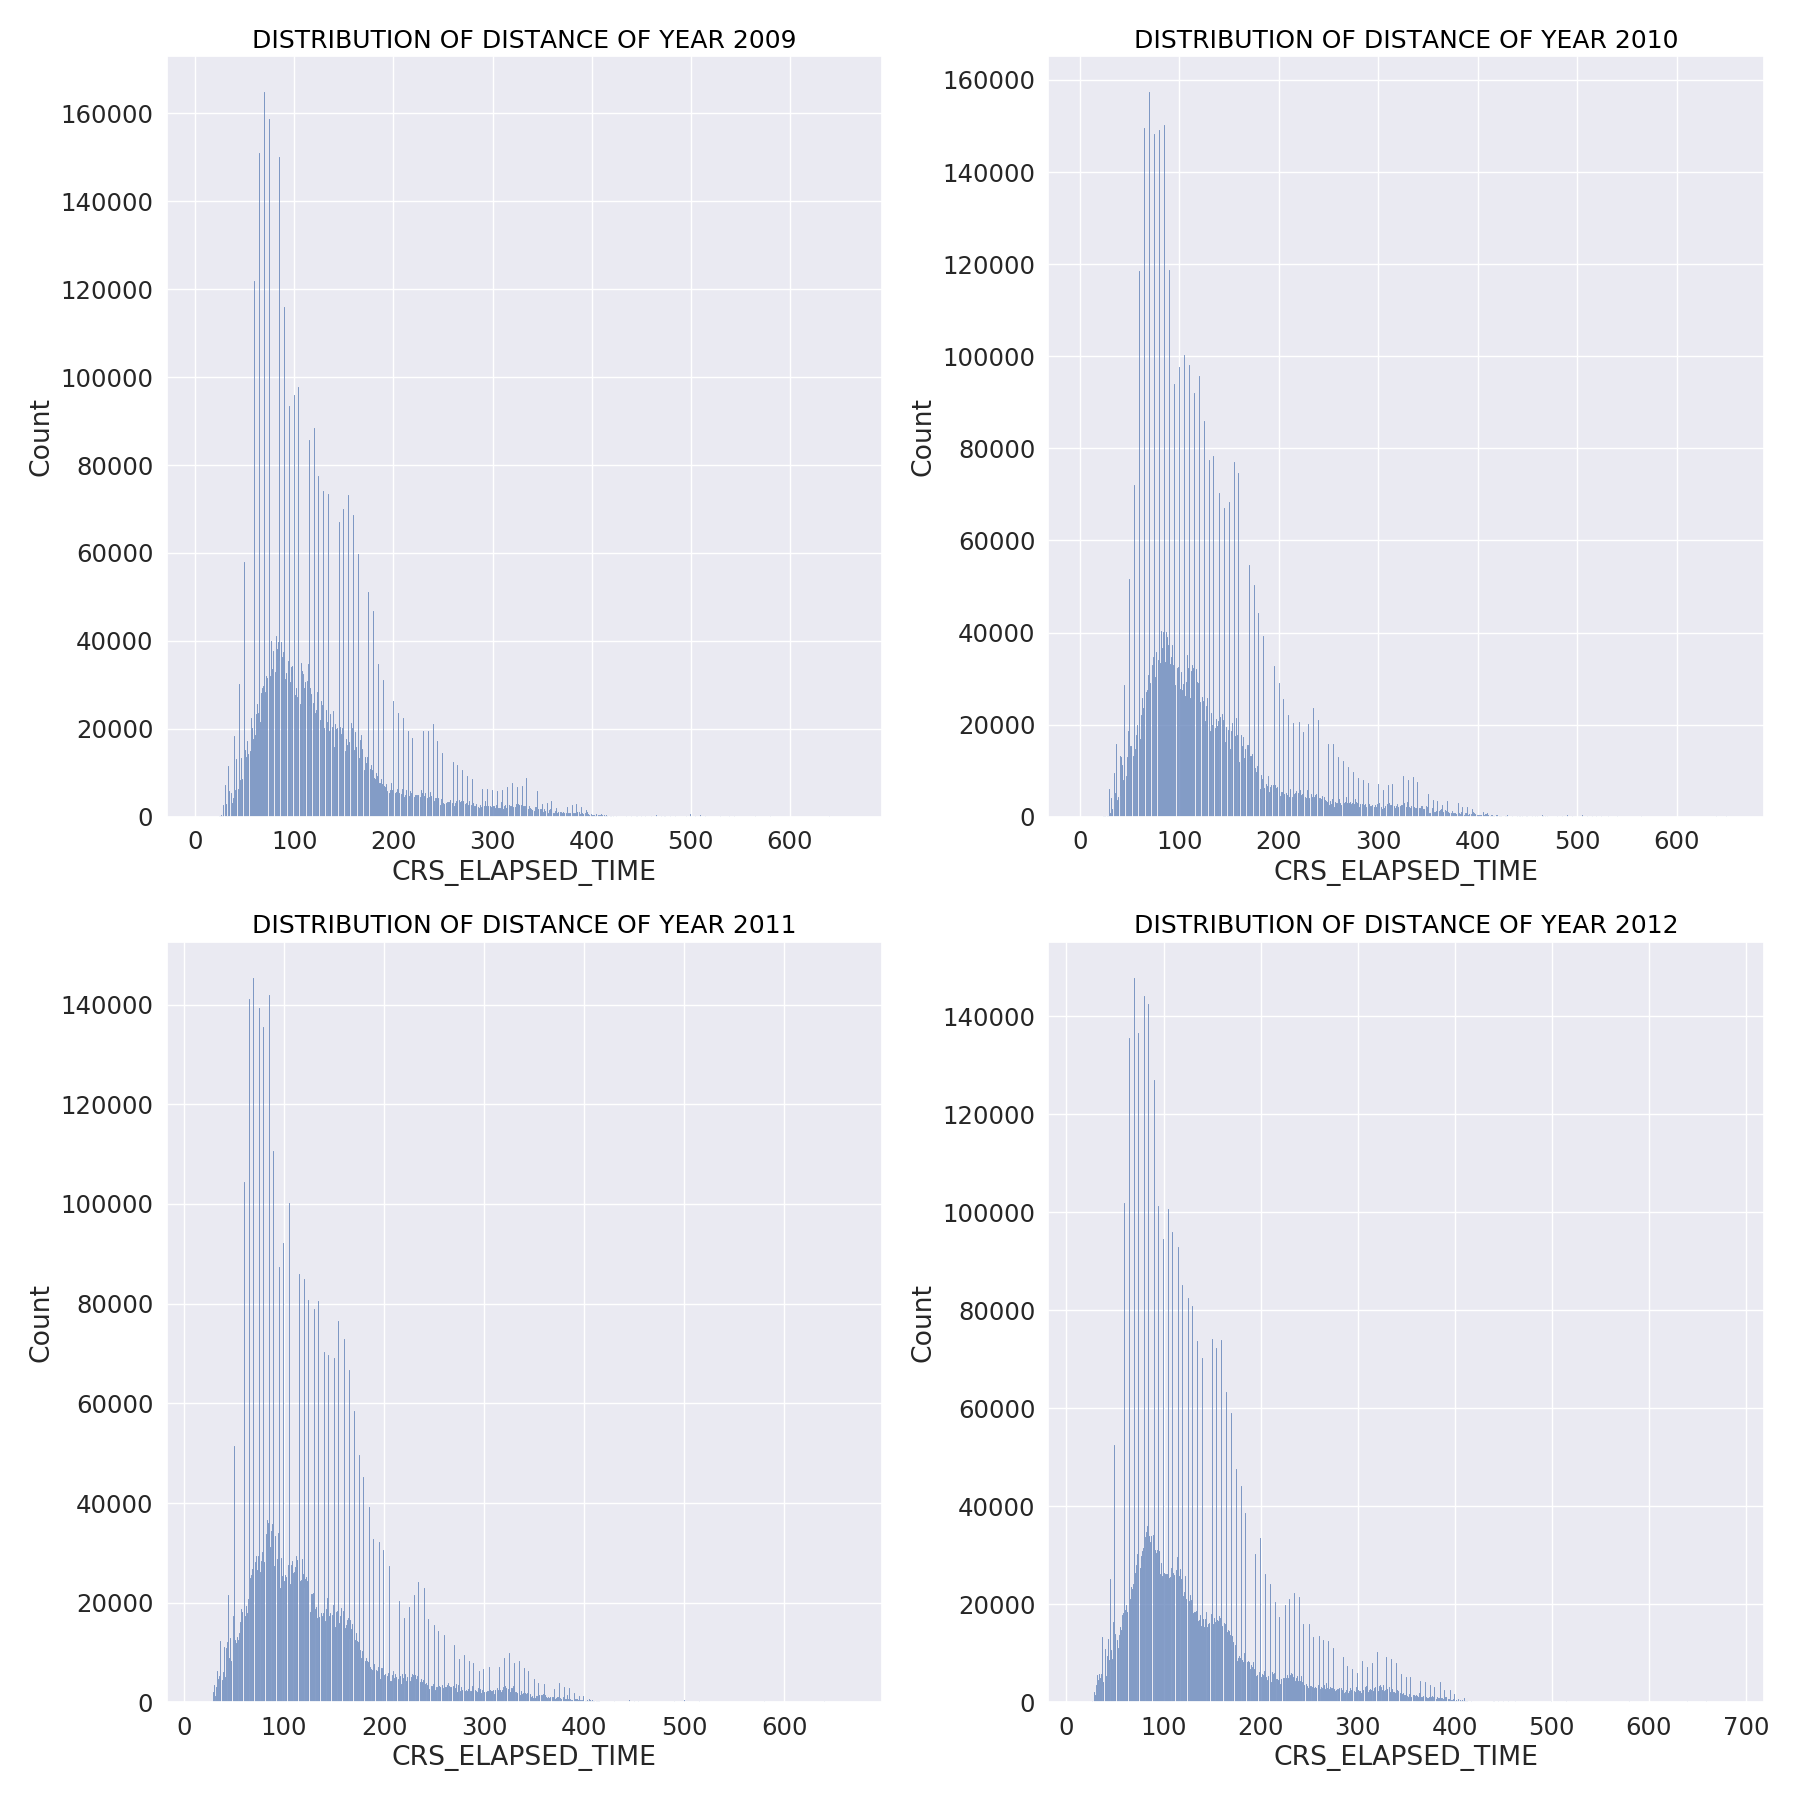

In [55]:
fig = plt.figure(figsize=(18, 18))
sns.set(font_scale=1.6)
sub1 = fig.add_subplot(221) # instead of plt.subplot(5, 2, 1)
sub1.set_title('DISTRIBUTION OF DISTANCE OF YEAR 2009', fontsize=18, color="black")
sub1 = sns.histplot(data=dfE_09,x="CRS_ELAPSED_TIME")

sub2 = fig.add_subplot(222)
sub2.set_title('DISTRIBUTION OF DISTANCE OF YEAR 2010', fontsize=18, color="black")
sub2 = sns.histplot(data=dfE_10,x="CRS_ELAPSED_TIME")

sub3 = fig.add_subplot(223)
sub3.set_title('DISTRIBUTION OF DISTANCE OF YEAR 2011', fontsize=18, color="black")
sub3 = sns.histplot(data=dfE_11,x="CRS_ELAPSED_TIME")

sub4 = fig.add_subplot(224)
sub4.set_title('DISTRIBUTION OF DISTANCE OF YEAR 2012', fontsize=18, color="black")
sub4 = sns.histplot(data=dfE_12,x="CRS_ELAPSED_TIME")

fig.tight_layout()

plt.show();
%matplot plt

In [56]:
new_df=df.select("DISTANCE","AIR_TIME","CRS_ELAPSED_TIME")
new_df.summary().show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-------+-----------------+------------------+------------------+
|summary|         DISTANCE|          AIR_TIME|  CRS_ELAPSED_TIME|
+-------+-----------------+------------------+------------------+
|  count|         60431020|          60431020|          60431020|
|   mean| 788.773631836762|109.78113457293952|137.16253448973723|
| stddev|594.6230835135357| 70.68177099761363| 73.48566312947708|
|    min|             11.0|               3.0|             -99.0|
|    25%|            354.0|              58.0|              84.0|
|    50%|            622.0|              91.0|             118.0|
|    75%|           1020.0|             139.0|             168.0|
|    max|           4983.0|             723.0|             718.0|
+-------+-----------------+------------------+------------------+

# Outlier detection for distance

In [57]:
q1=354
q3=1020
IQR=q3-q1
lower_bound=q1-1.5*IQR
upper_bound=q3+1.5*IQR
print("Lower bound for distance is: ",lower_bound,"Upper bound for distance is: ",upper_bound)
#data=data[~((data<lower_bound) | (data>upper_bound)).any(axis=1)]

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Lower bound for distance is:  -645.0 Upper bound for distance is:  2019.0

## Outlier detection for air_time

In [58]:
q1=58
q3=139
IQR=q3-q1
lower_bound=q1-1.5*IQR
upper_bound=q3+1.5*IQR
print("Lower bound for air_time is: ",lower_bound,"Upper bound for air_time is: ",upper_bound)
#data=data[~((data<lower_bound) | (data>upper_bound)).any(axis=1)]

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Lower bound for air_time is:  -63.5 Upper bound for air_time is:  260.5

## Outlier detection for CRS_ELAPSED_TIME

In [60]:
q1=84
q3=168
IQR=q3-q1
lower_bound=q1-1.5*IQR
upper_bound=q3+1.5*IQR
print("Lower bound for CRS_ELAPSED_TIME is: ",lower_bound,"Upper bound for CRS_ELAPSED_TIME is: ",upper_bound)
#data=data[~((data<lower_bound) | (data>upper_bound)).any(axis=1)]

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Lower bound for CRS_ELAPSED_TIME is:  -42.0 Upper bound for CRS_ELAPSED_TIME is:  294.0

In [61]:
l=['CRS_DEP_TIME', 'DEP_DELAY', 'TAXI_OUT', 'WHEELS_OFF', 
   'WHEELS_ON', 'TAXI_IN', 'CRS_ARR_TIME', 'ARR_DELAY', 'CRS_ELAPSED_TIME', 'ACTUAL_ELAPSED_TIME', 
   'AIR_TIME', 'DISTANCE', 'MONTH', 'WEEKDAY', 'YEAR', 'FLIGHT_STATUS']
out=[]


VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [62]:
list=[]
for i in out:
    list.append(tuple(i))

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [63]:
list

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

[]

In [64]:
from pyspark.sql.types import StructType,StructField, DoubleType

schema = StructType([ \
    StructField("CRS_DEP_TIME",DoubleType(),True), \
    StructField("DEP_DELAY",DoubleType(),True), \
    StructField("TAXI_OUT",DoubleType(),True), \
    StructField("WHEELS_OFF", DoubleType(), True), \
    StructField("WHEELS_ON", DoubleType(), True), \
    StructField("TAXI_IN", DoubleType(), True), \
    StructField("CRS_ARR_TIME", DoubleType(), True), \
    StructField("ARR_DELAY", DoubleType(), True), \
    StructField("CRS_ELAPSED_TIME", DoubleType(), True), \
    StructField("ACTUAL_ELAPSED_TIME", DoubleType(), True), \
    StructField("AIR_TIME", DoubleType(), True), \
    StructField("DISTANCE", DoubleType(), True), \
    StructField("MONTH", DoubleType(), True), \
    StructField("WEEKDAY", DoubleType(), True), \
    StructField("YEAR", DoubleType(), True), \
    StructField("FLIGHT_STATUS", DoubleType(), True) \
  ])
 


VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [65]:
df_cor = spark.createDataFrame(data=list,schema=schema)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [66]:
df_cor.show(truncate=False)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+------------+---------+--------+----------+---------+-------+------------+---------+----------------+-------------------+--------+--------+-----+-------+----+-------------+
|CRS_DEP_TIME|DEP_DELAY|TAXI_OUT|WHEELS_OFF|WHEELS_ON|TAXI_IN|CRS_ARR_TIME|ARR_DELAY|CRS_ELAPSED_TIME|ACTUAL_ELAPSED_TIME|AIR_TIME|DISTANCE|MONTH|WEEKDAY|YEAR|FLIGHT_STATUS|
+------------+---------+--------+----------+---------+-------+------------+---------+----------------+-------------------+--------+--------+-----+-------+----+-------------+
+------------+---------+--------+----------+---------+-------+------------+---------+----------------+-------------------+--------+--------+-----+-------+----+-------------+

In [67]:
df_cor_1=df_cor.toPandas()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [68]:
df_cor_1

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Empty DataFrame
Columns: [CRS_DEP_TIME, DEP_DELAY, TAXI_OUT, WHEELS_OFF, WHEELS_ON, TAXI_IN, CRS_ARR_TIME, ARR_DELAY, CRS_ELAPSED_TIME, ACTUAL_ELAPSED_TIME, AIR_TIME, DISTANCE, MONTH, WEEKDAY, YEAR, FLIGHT_STATUS]
Index: []

In [69]:
abs(df_cor_1)>.75

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Empty DataFrame
Columns: [CRS_DEP_TIME, DEP_DELAY, TAXI_OUT, WHEELS_OFF, WHEELS_ON, TAXI_IN, CRS_ARR_TIME, ARR_DELAY, CRS_ELAPSED_TIME, ACTUAL_ELAPSED_TIME, AIR_TIME, DISTANCE, MONTH, WEEKDAY, YEAR, FLIGHT_STATUS]
Index: []

In [71]:
df_cor_1.index=['CRS_DEP_TIME', 'DEP_DELAY', 'TAXI_OUT', 'WHEELS_OFF', 
   'WHEELS_ON', 'TAXI_IN', 'CRS_ARR_TIME', 'ARR_DELAY', 'CRS_ELAPSED_TIME', 'ACTUAL_ELAPSED_TIME', 
   'AIR_TIME', 'DISTANCE', 'MONTH', 'WEEKDAY', 'YEAR', 'FLIGHT_STATUS']

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

An error was encountered:
Length mismatch: Expected axis has 0 elements, new values have 16 elements
Traceback (most recent call last):
  File "/usr/local/lib64/python3.7/site-packages/pandas/core/generic.py", line 5475, in __setattr__
    return object.__setattr__(self, name, value)
  File "pandas/_libs/properties.pyx", line 66, in pandas._libs.properties.AxisProperty.__set__
  File "/usr/local/lib64/python3.7/site-packages/pandas/core/generic.py", line 669, in _set_axis
    self._mgr.set_axis(axis, labels)
  File "/usr/local/lib64/python3.7/site-packages/pandas/core/internals/managers.py", line 221, in set_axis
    f"Length mismatch: Expected axis has {old_len} elements, new "
ValueError: Length mismatch: Expected axis has 0 elements, new values have 16 elements



In [72]:
plt.figure(figsize=(20,14))
ax = sns.heatmap(dfm.corr(), cmap='viridis', center=0, annot=True)
bottom, top = ax.get_ylim()
plt.text(0,-0.6, "df2 - Heat Map", fontsize = 30, color='Black', fontstyle='normal')
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.yticks(rotation=0, fontsize=14)
plt.xticks(rotation=90, fontsize=14)
plt.show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

An error was encountered:
name 'dfm' is not defined
Traceback (most recent call last):
NameError: name 'dfm' is not defined



In [ ]:
plt.figure(figsize=(20,14))
ax = sns.heatmap(df_cor_1, cmap='viridis', center=0, annot=True,annot_kws={"fontsize":10})
bottom, top = ax.get_ylim()
plt.text(0,-0.6, "df_cor_1 - Heat Map", fontsize = 30, color='Black', fontstyle='normal')
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.yticks(rotation=0, fontsize=14)
plt.xticks(rotation=90, fontsize=14)
plt.show();

In [ ]:
%matplot plt